In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
load_data = pd.read_csv('/content/drive/MyDrive/EE559 Machine Learning Project /laptop_data_train.csv')

In [ ]:
load_data = pd.read_csv("/content/laptop_data_train.csv")

Check for missing values and skews

In [ ]:
load_data.isnull().values.any()

False

No missing values

Feature engineering

In [ ]:
# Unnamed column
load_data.drop(columns=['Number'], inplace= True)

In [ ]:
load_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Company
Dell         211
Lenovo       210
HP           162
Asus         118
Acer          77
Toshiba       32
MSI           31
Apple         17
Samsung        8
Mediacom       7
Microsoft      6
Razer          5
Xiaomi         4
Chuwi          3
Google         3
Huawei         2
Vero           2
Fujitsu        2
LG             1
Name: count, dtype: int64

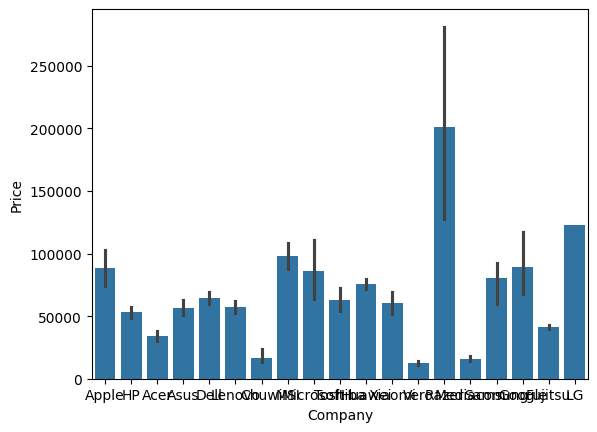

In [ ]:
sns.barplot(x=load_data['Company'], y=load_data['Price'])

load_data['Company'].value_counts()

TypeName
Notebook              513
Gaming                138
Ultrabook             136
2 in 1 Convertible     76
Workstation            23
Netbook                15
Name: count, dtype: int64

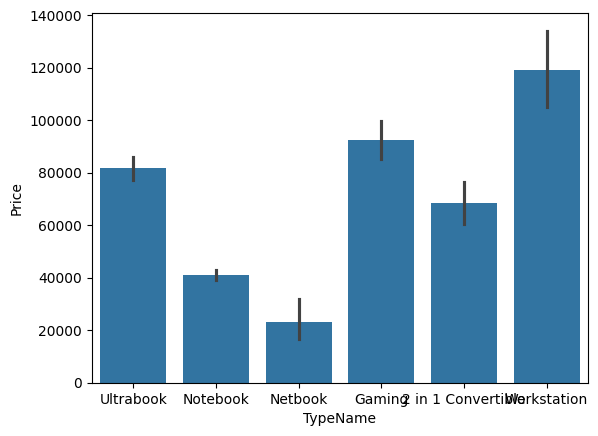

In [ ]:
sns.barplot(x=load_data['TypeName'], y=load_data['Price'])
load_data['TypeName'].value_counts()

<Axes: xlabel='Cpu', ylabel='Price'>

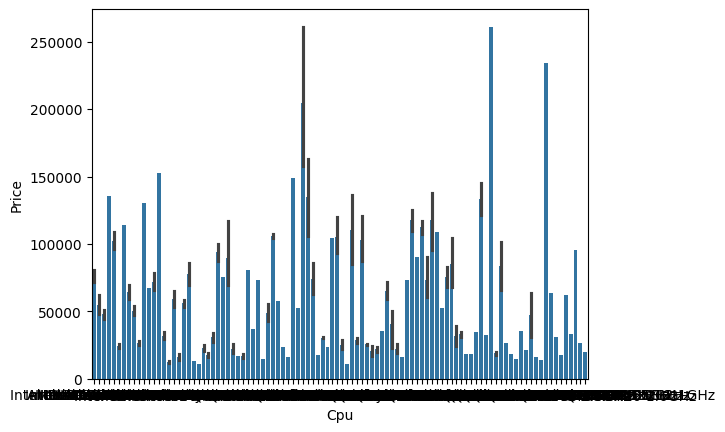

In [ ]:
# Column CPU
# before feature engineering

sns.barplot(x=load_data['Cpu'], y=load_data['Price'])



In [ ]:
load_data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     139
Intel Core i7 7700HQ 2.8GHz    117
Intel Core i7 7500U 2.7GHz      93
Intel Core i5 8250U 1.6GHz      71
Intel Core i7 8550U 1.8GHz      71
                              ... 
AMD E-Series E2-6110 1.5GHz      1
Intel Atom x5-Z8300 1.44GHz      1
Intel Core i7 7700HQ 2.7GHz      1
Intel Core M m3-7Y30 2.2GHz      1
AMD A4-Series 7210 2.2GHz        1
Name: count, Length: 100, dtype: int64

<Axes: xlabel='Cpu_Processor', ylabel='Price'>

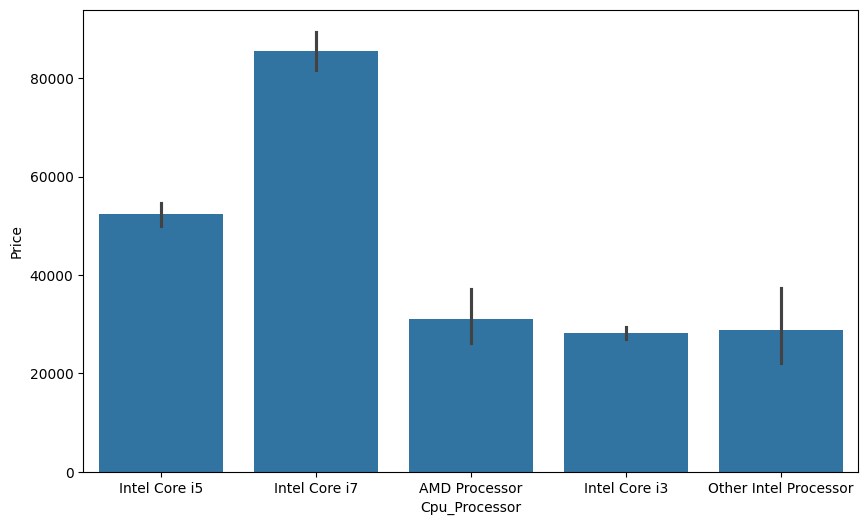

In [ ]:
# Extract CPU type
load_data['Cpu_Type'] = load_data['Cpu'].apply(lambda x: ' '.join(x.split()[:3]))

def processor(data):
    if 'Intel Core i3' in data or 'Intel Core i5' in data or 'Intel Core i7' in data:
        return data
    elif 'Intel' in data:
        return 'Other Intel Processor'
    elif 'AMD' in data:
        return 'AMD Processor'
    else:
        return 'Other Processor'

load_data['Cpu_Processor'] = load_data['Cpu_Type'].map(processor)

# Set the figure size
plt.figure(figsize=(10, 6))

# Other Processor record can be neglected since it is just 1
load_data = load_data[load_data['Cpu_Processor'] != 'Other Processor']

# After feature engineering
sns.barplot(x=load_data['Cpu_Processor'], y=load_data['Price'])


In [ ]:
load_data['Cpu_Processor'].value_counts()

Cpu_Processor
Intel Core i7            357
Intel Core i5            299
Intel Core i3            100
Other Intel Processor     98
AMD Processor             47
Name: count, dtype: int64

In [ ]:
#Drop unnecessary columns
load_data.drop(columns=['Cpu_Type', 'Cpu'], inplace=True)

In [ ]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           901 non-null    object 
 1   TypeName          901 non-null    object 
 2   Inches            901 non-null    float64
 3   ScreenResolution  901 non-null    object 
 4   Ram               901 non-null    object 
 5   Memory            901 non-null    object 
 6   Gpu               901 non-null    object 
 7   OpSys             901 non-null    object 
 8   Weight            901 non-null    object 
 9   Price             901 non-null    float64
 10  Cpu_Processor     901 non-null    object 
dtypes: float64(2), object(9)
memory usage: 77.6+ KB


In [ ]:
# Columns Ram and Weight
def convert_ram(data):
  return int(data.replace('GB', ''))

load_data['Ram'] = load_data['Ram'].astype(str).str.replace('GB', '').apply(convert_ram).astype('int32')

def convert_weight(data):
  return float(data.replace('kg', ''))

load_data['Weight'] = load_data['Weight'].astype(str).str.replace('kg', '').apply(convert_weight).astype('float32')



In [ ]:
load_data.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_Processor
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5


<Axes: xlabel='Gpu', ylabel='Price'>

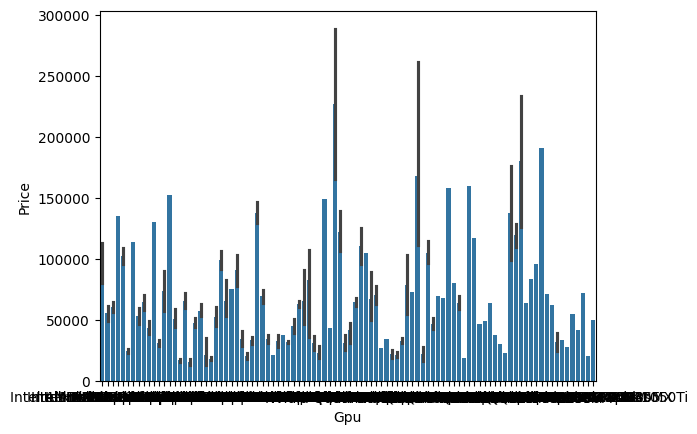

In [ ]:
# Column GPU
# before feature engineering

sns.barplot(x=load_data['Gpu'], y=load_data['Price'])

In [ ]:
load_data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620        205
Intel HD Graphics 520         83
Intel UHD Graphics 620        66
Nvidia GeForce GTX 1050       55
AMD Radeon 530                37
                            ... 
Nvidia GeForce GTX1050 Ti      1
AMD R17M-M1-70                 1
Nvidia Quadro M620M            1
Nvidia GeForce GTX 970M        1
Nvidia GeForce GTX 1050Ti      1
Name: count, Length: 96, dtype: int64

<Axes: xlabel='Gpu_Type', ylabel='Price'>

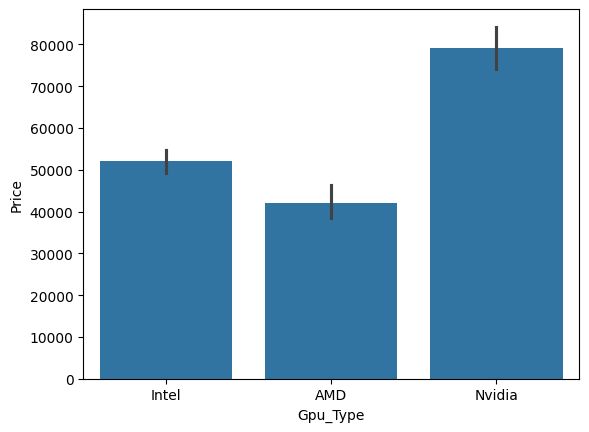

In [ ]:
# Extract GPU type
load_data['Gpu_Type'] = load_data['Gpu'].apply(lambda x: x.split()[0])

# Other Processor record can be neglected since it is just 1
load_data = load_data[load_data['Gpu_Type'] != 'ARM']

# After feature engineering
sns.barplot(x=load_data['Gpu_Type'], y=load_data['Price'])

In [ ]:
#Drop unnecessary columns
load_data.drop(columns=['Gpu'], inplace=True)

In [ ]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           901 non-null    object 
 1   TypeName          901 non-null    object 
 2   Inches            901 non-null    float64
 3   ScreenResolution  901 non-null    object 
 4   Ram               901 non-null    int32  
 5   Memory            901 non-null    object 
 6   OpSys             901 non-null    object 
 7   Weight            901 non-null    float32
 8   Price             901 non-null    float64
 9   Cpu_Processor     901 non-null    object 
 10  Gpu_Type          901 non-null    object 
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 70.5+ KB


<Axes: xlabel='OpSys', ylabel='Price'>

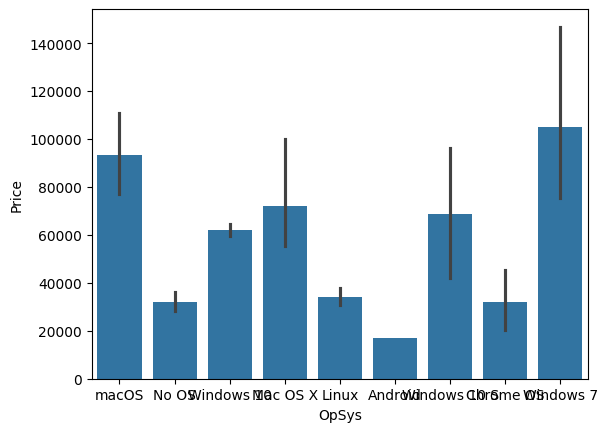

In [ ]:
# Column OpSys
# before feature engineering

sns.barplot(x=load_data['OpSys'], y=load_data['Price'])

In [ ]:
load_data['OpSys'].value_counts()

OpSys
Windows 10      752
No OS            50
Linux            47
Chrome OS        18
macOS            13
Windows 10 S      8
Windows 7         8
Mac OS X          4
Android           1
Name: count, dtype: int64

<Axes: xlabel='OpSys_Processor', ylabel='Price'>

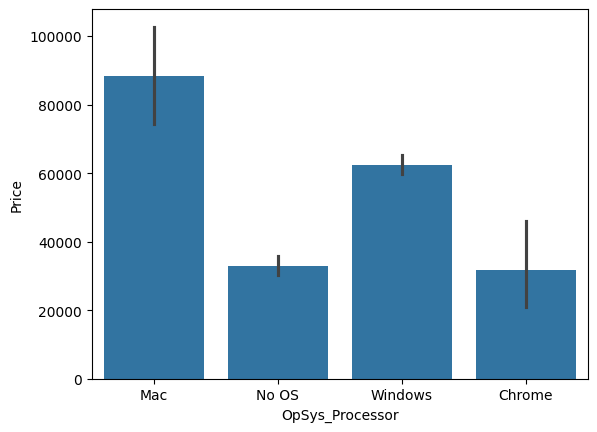

In [ ]:
# Extract OpSys type
def OS(data):
    if 'Windows 10' in data or 'Windows 7' in data or 'Windows 10 S' in data:
        return 'Windows'
    elif 'macOS' in data or 'Mac OS X' in data:
        return 'Mac'
    elif 'Chrome OS' in data:
        return 'Chrome'
    else:
        return 'No OS' #Android can be neglected

load_data['OpSys_Processor'] = load_data['OpSys'].map(OS)

# After feature engineering
sns.barplot(x=load_data['OpSys_Processor'], y=load_data['Price'])



In [ ]:
#Drop unnecessary columns
load_data.drop(columns=['OpSys'], inplace=True)

In [ ]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           901 non-null    object 
 1   TypeName          901 non-null    object 
 2   Inches            901 non-null    float64
 3   ScreenResolution  901 non-null    object 
 4   Ram               901 non-null    int32  
 5   Memory            901 non-null    object 
 6   Weight            901 non-null    float32
 7   Price             901 non-null    float64
 8   Cpu_Processor     901 non-null    object 
 9   Gpu_Type          901 non-null    object 
 10  OpSys_Processor   901 non-null    object 
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 70.5+ KB


<Axes: xlabel='Memory', ylabel='Price'>

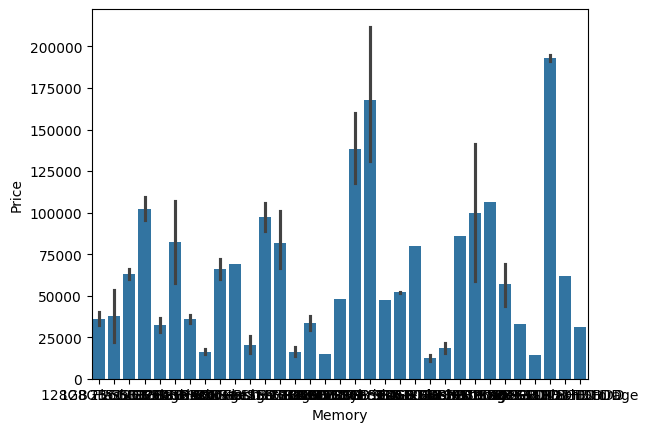

In [ ]:
# Column Memory
# before feature engineering

sns.barplot(x=load_data['Memory'], y=load_data['Price'])

In [ ]:
load_data['Memory'].value_counts()

Memory
256GB SSD                        292
1TB HDD                          160
512GB SSD                         84
500GB HDD                         73
128GB SSD +  1TB HDD              64
128GB SSD                         60
256GB SSD +  1TB HDD              48
32GB Flash Storage                27
2TB HDD                           14
1TB SSD                           10
256GB SSD +  2TB HDD              10
512GB SSD +  1TB HDD              10
64GB Flash Storage                 8
16GB Flash Storage                 5
32GB SSD                           5
128GB Flash Storage                4
256GB Flash Storage                4
180GB SSD                          4
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
16GB SSD                           2
512GB SSD +  2TB HDD               2
64GB Flash Storage +  1TB HDD      1
512GB Flash Storage                1
32GB HDD                           1
1TB HDD +  1TB HDD                 1
1.0TB Hybrid                   

<Axes: xlabel='Memory_Type', ylabel='Price'>

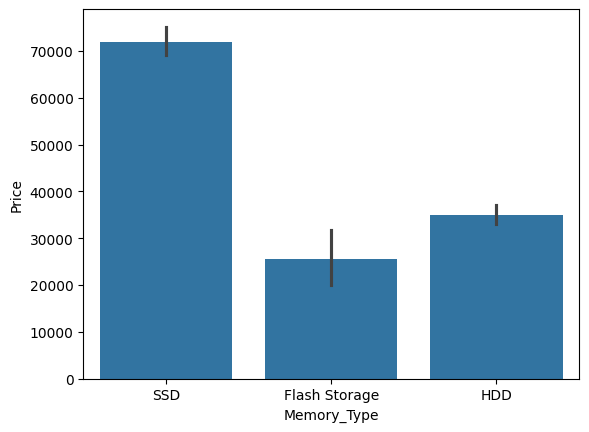

In [ ]:
def extract_memory_type(data):
    if 'SSD' in data:
        return 'SSD'
    elif 'HDD' in data:
        return 'HDD'
    else:
        return 'Flash Storage' #Hybrid can be neglected

load_data['Memory_Type'] = load_data['Memory'].map(extract_memory_type)
load_data['Capacity'] = load_data['Memory'].apply(lambda x: x.split()[0] if ' ' in x else None)

# After feature engineering
sns.barplot(x=load_data['Memory_Type'], y=load_data['Price'])


In [ ]:
load_data['Capacity'].value_counts()

Capacity
256GB    356
1TB      173
128GB    131
512GB     99
500GB     73
32GB      33
2TB       14
64GB      10
16GB       7
180GB      4
1.0TB      1
Name: count, dtype: int64

<Axes: xlabel='Memory_Capacity', ylabel='Price'>

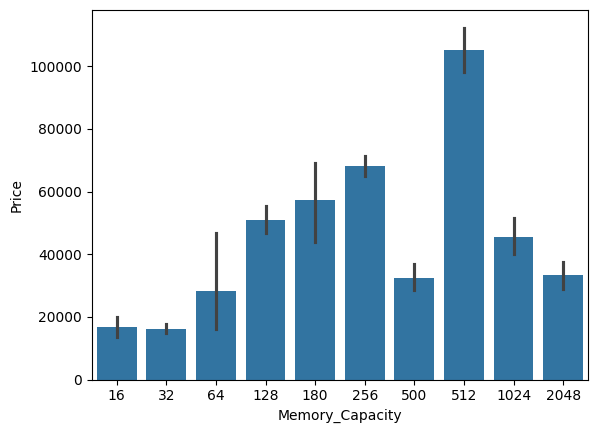

In [ ]:
def convert(data):
    if 'TB' in data:
        return int(float(data.replace('TB', '')) * 1024)
    elif 'GB' in data:
        return int(data.replace('GB', ''))
    else:
        return None

load_data['Memory_Capacity'] = load_data['Capacity'].map(convert)

# After feature engineering
sns.barplot(x=load_data['Memory_Capacity'], y=load_data['Price'])

In [ ]:
#Drop unnecessary columns
load_data.drop(columns=['Memory','Capacity'], inplace=True)

In [ ]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           901 non-null    object 
 1   TypeName          901 non-null    object 
 2   Inches            901 non-null    float64
 3   ScreenResolution  901 non-null    object 
 4   Ram               901 non-null    int32  
 5   Weight            901 non-null    float32
 6   Price             901 non-null    float64
 7   Cpu_Processor     901 non-null    object 
 8   Gpu_Type          901 non-null    object 
 9   OpSys_Processor   901 non-null    object 
 10  Memory_Type       901 non-null    object 
 11  Memory_Capacity   901 non-null    int64  
dtypes: float32(1), float64(2), int32(1), int64(1), object(7)
memory usage: 77.6+ KB


<Axes: xlabel='ScreenResolution', ylabel='Price'>

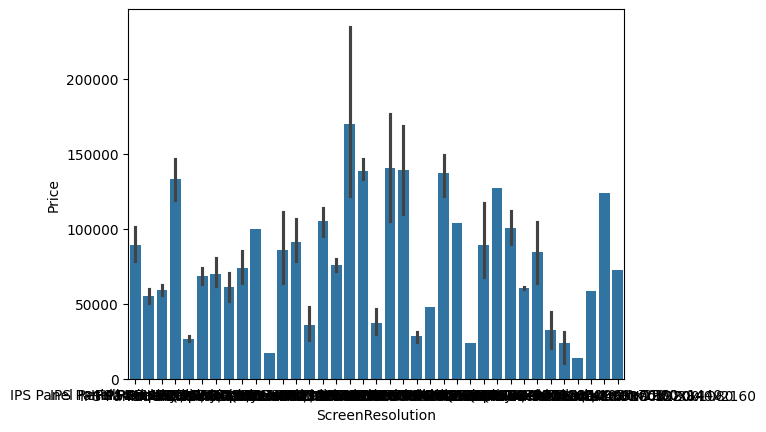

In [ ]:
# Column ScreenResolution
# before feature engineering

sns.barplot(x=load_data['ScreenResolution'], y=load_data['Price'])

In [ ]:
load_data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                370
1366x768                                         166
IPS Panel Full HD 1920x1080                      166
Full HD / Touchscreen 1920x1080                   34
IPS Panel Full HD / Touchscreen 1920x1080         31
1600x900                                          17
Touchscreen 1366x768                              14
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
IPS Panel 4K Ultra HD 3840x2160                    9
4K Ultra HD / Touchscreen 3840x2160                8
IPS Panel 1366x768                                 7
Quad HD+ / Touchscreen 3200x1800                   6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
4K Ultra HD 3840x2160                              5
Touchscreen 2560x1440                              4
1440x900                                           4
IPS Panel Retina Display 2880x1800                 4
IPS Panel Retina Display 2304

<Axes: xlabel='Resolution_Type', ylabel='Price'>

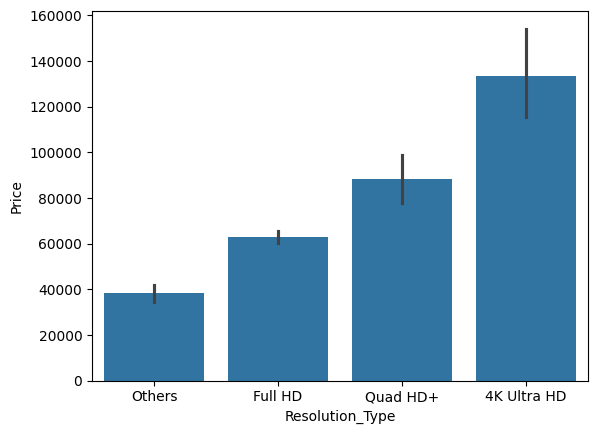

In [ ]:
# Define a function to categorize the resolution type
def resolution_type(resolution):
    if 'Full HD' in resolution:
        return 'Full HD'
    elif 'Quad HD+' in resolution:
        return 'Quad HD+'
    elif '4K Ultra HD' in resolution:
        return '4K Ultra HD'
    else:
        return 'Others'

# Define a function to determine if the screen is touchscreen
def is_touchscreen(resolution):
    return 'Touchscreen' if 'Touchscreen' in resolution else 'No-touch'

def dimension(resolution):
    if '1920x1080' in resolution:
        return '1920x1080'
    elif '3200x1800' in resolution:
        return '3200x1800'
    elif '3840x2160' in resolution:
        return '3840x2160'
    else:
        return 'Others'

# Apply the functions to create new columns
load_data['Resolution_Type'] = load_data['ScreenResolution'].apply(resolution_type)
load_data['Touchscreen'] = load_data['ScreenResolution'].apply(is_touchscreen)
load_data['Resolution_dimensions'] = load_data['ScreenResolution'].apply(dimension)

# After feature engineering
sns.barplot(x=load_data['Resolution_Type'], y=load_data['Price'])


<Axes: xlabel='Touchscreen', ylabel='Price'>

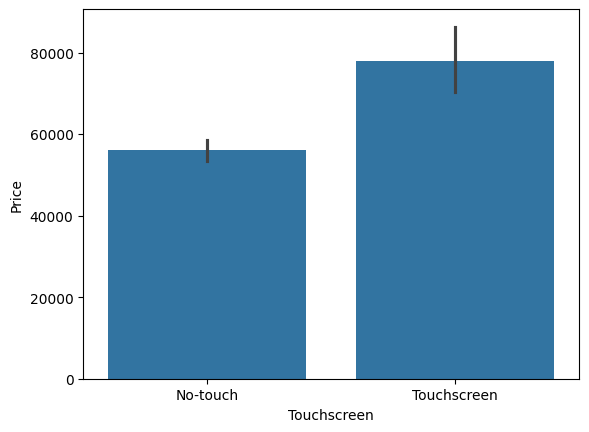

In [ ]:
# After feature engineering
sns.barplot(x=load_data['Touchscreen'], y=load_data['Price'])

<Axes: xlabel='Resolution_dimensions', ylabel='Price'>

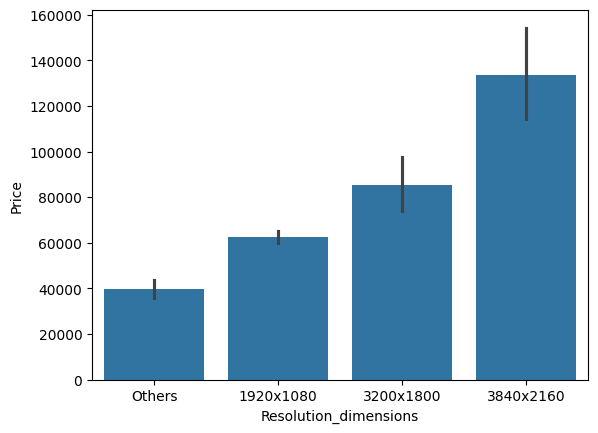

In [ ]:
# After feature engineering
sns.barplot(x=load_data['Resolution_dimensions'], y=load_data['Price'])

In [ ]:
#Drop unnecessary columns
load_data.drop(columns=['ScreenResolution'], inplace=True)

In [ ]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company                901 non-null    object 
 1   TypeName               901 non-null    object 
 2   Inches                 901 non-null    float64
 3   Ram                    901 non-null    int32  
 4   Weight                 901 non-null    float32
 5   Price                  901 non-null    float64
 6   Cpu_Processor          901 non-null    object 
 7   Gpu_Type               901 non-null    object 
 8   OpSys_Processor        901 non-null    object 
 9   Memory_Type            901 non-null    object 
 10  Memory_Capacity        901 non-null    int64  
 11  Resolution_Type        901 non-null    object 
 12  Touchscreen            901 non-null    object 
 13  Resolution_dimensions  901 non-null    object 
dtypes: float32(1), float64(2), int32(1), int64(1), object(9)
m

In [ ]:
load_data.head()

,Company,TypeName,Inches,Ram,Weight,Price,Cpu_Processor,Gpu_Type,OpSys_Processor,Memory_Type,Memory_Capacity,Resolution_Type,Touchscreen,Resolution_dimensions
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,Intel Core i5,Intel,Mac,SSD,128,Others,No-touch,Others
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,Intel Core i5,Intel,Mac,Flash Storage,128,Others,No-touch,Others
2,HP,Notebook,15.6,8,1.86,30636.0000,Intel Core i5,Intel,No OS,SSD,256,Full HD,No-touch,1920x1080
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,Intel Core i7,AMD,Mac,SSD,512,Others,No-touch,Others
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,Intel Core i5,Intel,Mac,SSD,256,Others,No-touch,Others


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           402 non-null    object 
 1   TypeName          402 non-null    object 
 2   Inches            402 non-null    float64
 3   ScreenResolution  402 non-null    object 
 4   Ram               402 non-null    object 
 5   Memory            402 non-null    object 
 6   Gpu               402 non-null    object 
 7   OpSys             402 non-null    object 
 8   Weight            402 non-null    object 
 9   Price             402 non-null    float64
 10  Cpu_Processor     402 non-null    object 
dtypes: float64(2), object(9)
memory usage: 34.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           402 non-n

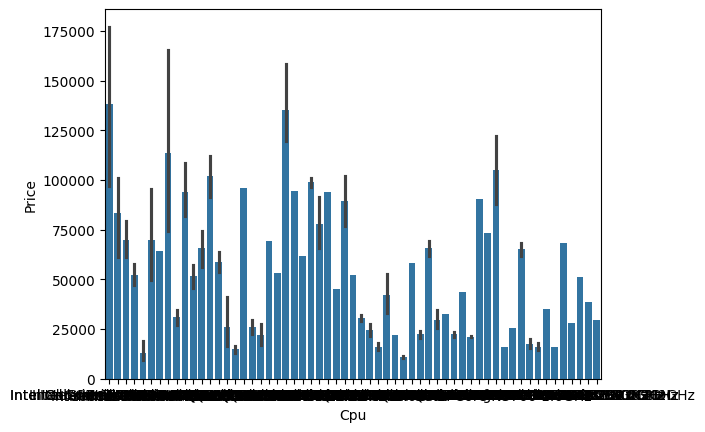

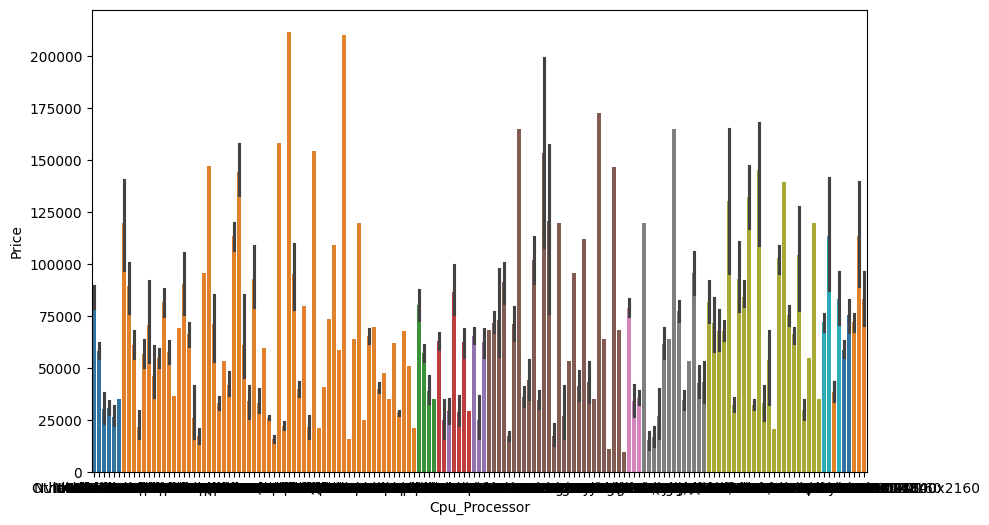

In [ ]:
#load_data_test = pd.read_csv('/content/drive/MyDrive/EE559 Machine Learning Project /laptop_data_test.csv')
load_data_test = pd.read_csv('/content/laptop_data_test.csv')
load_data_test.isnull().values.any()

# Unnamed column
load_data_test.drop(columns=['Number'], inplace=True)
load_data_test.head()

# Column CPU
# before feature engineering

sns.barplot(x=load_data_test['Cpu'], y=load_data_test['Price'])
load_data_test['Cpu'].value_counts()

# Extract CPU type
load_data_test['Cpu_Type'] = load_data_test['Cpu'].apply(lambda x: ' '.join(x.split()[:3]))

def processor(data):
    if 'Intel Core i3' in data or 'Intel Core i5' in data or 'Intel Core i7' in data:
        return data
    elif 'Intel' in data:
        return 'Other Intel Processor'
    elif 'AMD' in data:
        return 'AMD Processor'
    else:
        return 'Other Processor'

load_data_test['Cpu_Processor'] = load_data_test['Cpu_Type'].map(processor)

# Set the figure size
plt.figure(figsize=(10, 6))

# After feature engineering
sns.barplot(x=load_data_test['Cpu_Processor'], y=load_data_test['Price'])

load_data_test['Cpu_Processor'].value_counts()

# Drop unnecessary columns
load_data_test.drop(columns=['Cpu_Type', 'Cpu'], inplace=True)
load_data_test.info()

# Columns Ram and Weight
def convert_ram(data):
    return int(data.replace('GB', ''))

load_data_test['Ram'] = load_data_test['Ram'].astype(str).str.replace('GB', '').apply(convert_ram).astype('int32')

def convert_weight(data):
    return float(data.replace('kg', ''))

load_data_test['Weight'] = load_data_test['Weight'].astype(str).str.replace('kg', '').apply(convert_weight).astype('float32')

load_data_test.head()

# Column GPU
# before feature engineering

sns.barplot(x=load_data_test['Gpu'], y=load_data_test['Price'])

load_data_test['Gpu'].value_counts()

# Extract GPU type
load_data_test['Gpu_Type'] = load_data_test['Gpu'].apply(lambda x: x.split()[0])

# After feature engineering
sns.barplot(x=load_data_test['Gpu_Type'], y=load_data_test['Price'])

# Drop unnecessary columns
load_data_test.drop(columns=['Gpu'], inplace=True)

load_data_test.info()

# Column OpSys
# before feature engineering

sns.barplot(x=load_data_test['OpSys'], y=load_data_test['Price'])
load_data_test['OpSys'].value_counts()

# Extract OpSys type
def OS(data):
    if 'Windows 10' in data or 'Windows 7' in data or 'Windows 10 S' in data:
        return 'Windows'
    elif 'macOS' in data or 'Mac OS X' in data:
        return 'Mac'
    elif 'Chrome OS' in data:
        return 'Chrome'
    else:
        return 'No OS'  # Android can be neglected

load_data_test['OpSys_Processor'] = load_data_test['OpSys'].map(OS)

# After feature engineering
sns.barplot(x=load_data_test['OpSys_Processor'], y=load_data_test['Price'])

# Drop unnecessary columns
load_data_test.drop(columns=['OpSys'], inplace=True)
load_data_test.info()

# Column Memory
# before feature engineering

sns.barplot(x=load_data_test['Memory'], y=load_data_test['Price'])
load_data_test['Memory'].value_counts()

def extract_memory_type(data):
    if 'SSD' in data:
        return 'SSD'
    elif 'HDD' in data:
        return 'HDD'
    else:
        return 'Flash Storage'  # Hybrid can be neglected

load_data_test['Memory_Type'] = load_data_test['Memory'].map(extract_memory_type)
load_data_test['Capacity'] = load_data_test['Memory'].apply(lambda x: x.split()[0] if ' ' in x else None)

# After feature engineering
sns.barplot(x=load_data_test['Memory_Type'], y=load_data_test['Price'])
load_data_test['Capacity'].value_counts()


def convert(data):
    if 'TB' in data:
        return int(float(data.replace('TB', '')) * 1024)
    elif 'GB' in data:
        return int(data.replace('GB', ''))
    else:
        return None


load_data_test['Memory_Capacity'] = load_data_test['Capacity'].map(convert)

# After feature engineering
sns.barplot(x=load_data_test['Memory_Capacity'], y=load_data_test['Price'])
# Drop unnecessary columns
load_data_test.drop(columns=['Memory', 'Capacity'], inplace=True)
load_data_test.info()

# Column ScreenResolution
# before feature engineering

sns.barplot(x=load_data_test['ScreenResolution'], y=load_data_test['Price'])

load_data_test['ScreenResolution'].value_counts()

# Define a function to categorize the resolution type
def resolution_type(resolution):
    if 'Full HD' in resolution:
        return 'Full HD'
    elif 'Quad HD+' in resolution:
        return 'Quad HD+'
    elif '4K Ultra HD' in resolution:
        return '4K Ultra HD'
    else:
        return 'Others'


# Define a function to determine if the screen is touchscreen
def is_touchscreen(resolution):
    return 'Touchscreen' if 'Touchscreen' in resolution else 'No-touch'


def dimension(resolution):
    if '1920x1080' in resolution:
        return '1920x1080'
    elif '3200x1800' in resolution:
        return '3200x1800'
    elif '3840x2160' in resolution:
        return '3840x2160'
    else:
        return 'Others'


# Apply the functions to create new columns
load_data_test['Resolution_Type'] = load_data_test['ScreenResolution'].apply(resolution_type)
load_data_test['Touchscreen'] = load_data_test['ScreenResolution'].apply(is_touchscreen)
load_data_test['Resolution_dimensions'] = load_data_test['ScreenResolution'].apply(dimension)

# After feature engineering
sns.barplot(x=load_data_test['Resolution_Type'], y=load_data_test['Price'])
# After feature engineering
sns.barplot(x=load_data_test['Touchscreen'], y=load_data_test['Price'])

# After feature engineering
sns.barplot(x=load_data_test['Resolution_dimensions'], y=load_data_test['Price'])

# Drop unnecessary columns
load_data_test.drop(columns=['ScreenResolution'], inplace=True)
load_data_test.info()


# Combine training and test data
combined_data = pd.concat([load_data, load_data_test], axis=0)

categorical_cols = ['Company', 'TypeName', 'Cpu_Processor', 'Gpu_Type', 'OpSys_Processor', 'Memory_Type',
                    'Resolution_Type', 'Touchscreen', 'Resolution_dimensions']



In [ ]:
# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit OneHotEncoder on combined data
encoder.fit(combined_data[categorical_cols])

# Transform training and test data
train_encoded = encoder.transform(load_data[categorical_cols])
test_encoded = encoder.transform(load_data_test[categorical_cols])

# Assuming train_data and test_data are your original datasets
# and train_encoded, test_encoded are the encoded categorical features

# Convert train_encoded and test_encoded to DataFrame
train_encoded_df = pd.DataFrame(train_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
test_encoded_df = pd.DataFrame(test_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Convert encoded categorical features to integers
train_encoded_df = train_encoded_df.astype(int)
test_encoded_df = test_encoded_df.astype(int)

# Drop original categorical columns from train_data and test_data
train_data_numerical = load_data.drop(categorical_cols, axis=1)
test_data_numerical = load_data_test.drop(categorical_cols, axis=1)

# Concatenate numerical features with encoded categorical features
data_encoded = pd.concat([train_data_numerical, train_encoded_df], axis=1)
data_encoded_test = pd.concat([test_data_numerical, test_encoded_df], axis=1)

# Split the train dataset into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

#dropping the price coloumn and setting that to equal y

X = data_encoded.drop(columns=['Price'])
y = data_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

print(y)

0       71378.6832
1       47895.5232
2       30636.0000
3      135195.3360
4       96095.8080
          ...     
896     49497.1200
897     47952.0000
898     32713.9200
899     49816.8000
900    107257.9680
Name: Price, Length: 901, dtype: float64


# Trivial System
Predicts the mean of training output values for all the test inputs.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_train_price = np.mean(y_train_split)  # Trivial prediction (e.g., mean or median)

# Calculate MSE
trivial_mse = mean_squared_error(y_val_split, np.full_like(y_val_split, mean_train_price))
# Calculate RMSE
trivial_rmse = np.sqrt(trivial_mse)
# Calculate MAE
trivial_mae = mean_absolute_error(y_val_split, np.full_like(y_val_split, mean_train_price))

# Calculate R2
tss = np.sum((y_val_split - np.mean(y_train_split))**2)
rss = np.sum((y_val_split - mean_train_price)**2)
trivial_r2 = 1 - (rss / tss)

print("Mean Squared Error of trivial system:", trivial_mse)
print("Root Mean Squared Error (RMSE) of trivial system:", trivial_rmse)
print("Mean Absolute Error (MAE) of trivial system:", trivial_mae)
print("R-squared (R2) of trivial system:", trivial_r2)

Mean Squared Error of trivial system: 1206730772.014311
Root Mean Squared Error (RMSE) of trivial system: 34738.03062947454
Mean Absolute Error (MAE) of trivial system: 27264.261864938984
R-squared (R2) of trivial system: 0.0


FYI

An R-squared (R2) value of 0.0 for a trivial system is not uncommon, especially if the trivial prediction is based on the mean or median of the training data.

An R2 value of 0.0 indicates that the trivial system does not explain any of the variability in the target variable beyond what is explained by a model that simply predicts the mean (or median) of the target variable for all instances. In other words, the trivial system performs no better than just using the mean (or median) value as the prediction for every instance.

For certain datasets or prediction tasks, particularly those with high variability or noise, it's not uncommon for a trivial system to have an R2 value close to 0.0. However, if the R2 value is significantly negative or if the model's performance is worse than just using the mean (or median) value, it may indicate issues with the dataset or the model.

In summary, while an R2 value of 0.0 for a trivial system is not ideal, it's expected behavior in many cases, especially if the trivial prediction is based on the mean or median of the training data. It serves as a baseline for comparison with more complex models.

# Baseline Model 1: 1NN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

def train_knn(X_train_split, y_train_split):
    """
    Trains a KNeighborsRegressor model.

    Parameters:
        X_train_split: Features of the training set.
        y_train_split: Output values of the training set.

    Returns:
        Trained KNeighborsRegressor model.
    """
    knn = KNeighborsRegressor(n_neighbors=1)
    knn.fit(X_train_split, y_train_split)
    return knn


Training the Model


In [ ]:
knn_model = train_knn(X_train_split, y_train_split)

y_pred_knn = knn_model.predict(X_val_split)

mse_knn = mean_squared_error(y_val_split, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_val_split, y_pred_knn)
r2_knn = r2_score(y_val_split, y_pred_knn)

print("Mean Squared Error of 1NN:", mse_knn)
print("Root Mean Squared Error (RMSE) of 1NN:", rmse_knn)
print("Mean Absolute Error (MAE) of 1NN:", mae_knn)
print("R-squared (R2) of 1NN:", r2_knn)


Mean Squared Error of 1NN: 334111514.2322545
Root Mean Squared Error (RMSE) of 1NN: 18278.71752154003
Mean Absolute Error (MAE) of 1NN: 12016.852952380956
R-squared (R2) of 1NN: 0.7205244816683444


# Baseline Model 2: Linear Regression (no regularization)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def train_linear_regression(X_train_split, y_train_split):
    """
    Initializes and trains a Linear Regression model.

    Parameters:
        X_train_split (array-like): Features of the training set.
        y_train_split (array-like): Output values of the training set.

    Returns:
        Trained Linear Regression model.
    """
    linear_reg = LinearRegression()
    linear_reg.fit(X_train_split, y_train_split)
    return linear_reg

Training the Model


In [ ]:
linear_reg = train_linear_regression(X_train_split, y_train_split)

y_pred_linear_reg = linear_reg.predict(X_val_split)

mse_linear_reg = mean_squared_error(y_val_split, y_pred_linear_reg)
rmse_linear_reg = np.sqrt(mse_linear_reg)
mae_linear_reg = mean_absolute_error(y_val_split, y_pred_linear_reg)
r2_linear_reg = r2_score(y_val_split, y_pred_linear_reg)

print("Mean Squared Error Linear Regression:", mse_linear_reg)
print("Root Mean Squared Error Linear Regression:", rmse_linear_reg)
print("Mean Absolute Error Linear Regression:", mae_linear_reg)
print("R-squared Linear Regression:", r2_linear_reg)

Mean Squared Error Linear Regression: 342397534.25744057
Root Mean Squared Error Linear Regression: 18503.98698274079
Mean Absolute Error Linear Regression: 13438.112554519856
R-squared Linear Regression: 0.7135934432491309


# Random Forest Model

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

def train_random_forest(X_train_split, y_train_split):
    """
    Initializes and trains a Random Forest Regressor model.

    Parameters:
        X_train_split: Features of the training set.
        y_train_split: Output values of the training set.

    Returns:
        Trained Random Forest Regressor model.
    """
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_split, y_train_split)
    return rf_model

Training the Model


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

y_pred_rf = rf_model.predict(X_val_split)

mean_square_err_random_forest = mean_squared_error(y_val_split, y_pred_rf)
rmse_rf = np.sqrt(mean_square_err_random_forest)
mae_rf = mean_absolute_error(y_val_split, y_pred_rf)
r2_rf = r2_score(y_val_split, y_pred_rf)

print("Mean Squared Error Random Forest:", mean_square_err_random_forest)
print("Root Mean Squared Error Random Forest:", rmse_rf)
print("Mean Absolute Error Random Forest:", mae_rf)
print("R-squared Random Forest:", r2_rf)

Mean Squared Error Random Forest: 218048372.49268183
Root Mean Squared Error Random Forest: 14766.461068674573
Mean Absolute Error Random Forest: 9815.896874821468
R-squared Random Forest: 0.8176082555436719


# SVR Model

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def train_svr(X_train_split, y_train_split):
    """
    Trains a Support Vector Regressor (SVR) model.

    Parameters:
        X_train_split (array-like): Features of the training set.
        y_train_split (array-like): Output values of the training set.

    Returns:
        Trained SVR model.
    """
    svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
    svr_model.fit(X_train_split, y_train_split)
    return svr_model

Training the Model


In [ ]:
svr_model = train_svr(X_train_split, y_train_split)

y_pred_svr = svr_model.predict(X_val_split)

mean_square_err_svr = mean_squared_error(y_val_split, y_pred_svr)
rmse_svr = np.sqrt(mean_square_err_svr)
mae_svr = mean_absolute_error(y_val_split, y_pred_svr)
r2_svr = r2_score(y_val_split, y_pred_svr)

print("Mean Squared Error of SVR on Validation Set:", mean_square_err_svr)
print("Root Mean Squared Error of SVR on Validation Set:", rmse_svr)
print("Mean Absolute Error of SVR on Validation Set:", mae_svr)
print("R-squared of SVR on Validation Set:", r2_svr)


Mean Squared Error of SVR on Validation Set: 1223831774.2915282
Root Mean Squared Error of SVR on Validation Set: 34983.3070805424
Mean Absolute Error of SVR on Validation Set: 25667.50887076961
R-squared of SVR on Validation Set: -0.023703179630963023


# MLP Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001, max_iter=5000, random_state=42)

mlp_model.fit(X_train_split, y_train_split)

y_val_pred = mlp_model.predict(X_val_split)

r2_mlp = r2_score(y_val_split, y_val_pred)
mae_mlp = mean_absolute_error(y_val_split, y_val_pred)
mse_mlp = mean_squared_error(y_val_split, y_val_pred)
rmse_mlp = sqrt(mse_mlp)

print(f"Mean Squared Error (MSE): {mse_mlp}")
print(f"Mean Absolute Error (MAE): {mae_mlp}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlp}")
print(f"R^2 Score: {r2_mlp}")

Mean Squared Error (MSE): 355194273.8770722
Mean Absolute Error (MAE): 13461.00028277768
Root Mean Squared Error (RMSE): 18846.598469672776
R^2 Score: 0.7028893061996495


# Bayesian Ridge Regression Model

In [ ]:
from sklearn.linear_model import BayesianRidge

def train_bayesian_ridge(X_train, y_train):
    """
    Trains a Bayesian Ridge Regression model.

    Parameters:
        X_train: Features of the training set.
        y_train: Output values of the training set.

    Returns:
        Trained Bayesian Ridge Regression model.
    """
    bayesian_ridge = BayesianRidge()
    bayesian_ridge.fit(X_train, y_train)
    return bayesian_ridge


Training the Model


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

bayesian_ridge_model = train_bayesian_ridge(X_train, y_train)

y_pred_test = bayesian_ridge_model.predict(X_test)

mse_bayesian = mean_squared_error(y_test, y_pred_test)
rmse_bayesian = np.sqrt(mse_bayesian)
mae_bayesian = mean_absolute_error(y_test, y_pred_test)
r2_bayesian = r2_score(y_test, y_pred_test)

print("Mean Squared Error of Bayesian Ridge Regression:", mse_bayesian)
print("Root Mean Squared Error of Bayesian Ridge Regression:", rmse_bayesian)
print("Mean Absolute Error of Bayesian Ridge Regression:", mae_bayesian)
print("R-squared of Bayesian Ridge Regression:", r2_bayesian)




Mean Squared Error of Bayesian Ridge Regression: 335395145.4895941
Root Mean Squared Error of Bayesian Ridge Regression: 18313.796588626676
Mean Absolute Error of Bayesian Ridge Regression: 12436.49957312849
R-squared of Bayesian Ridge Regression: 0.7941580742500177


# Plot the three metrics (RMSE, MAE, R2) across the four models (Random Forest, MLP, SVR, Bayesian Ridge) - Train

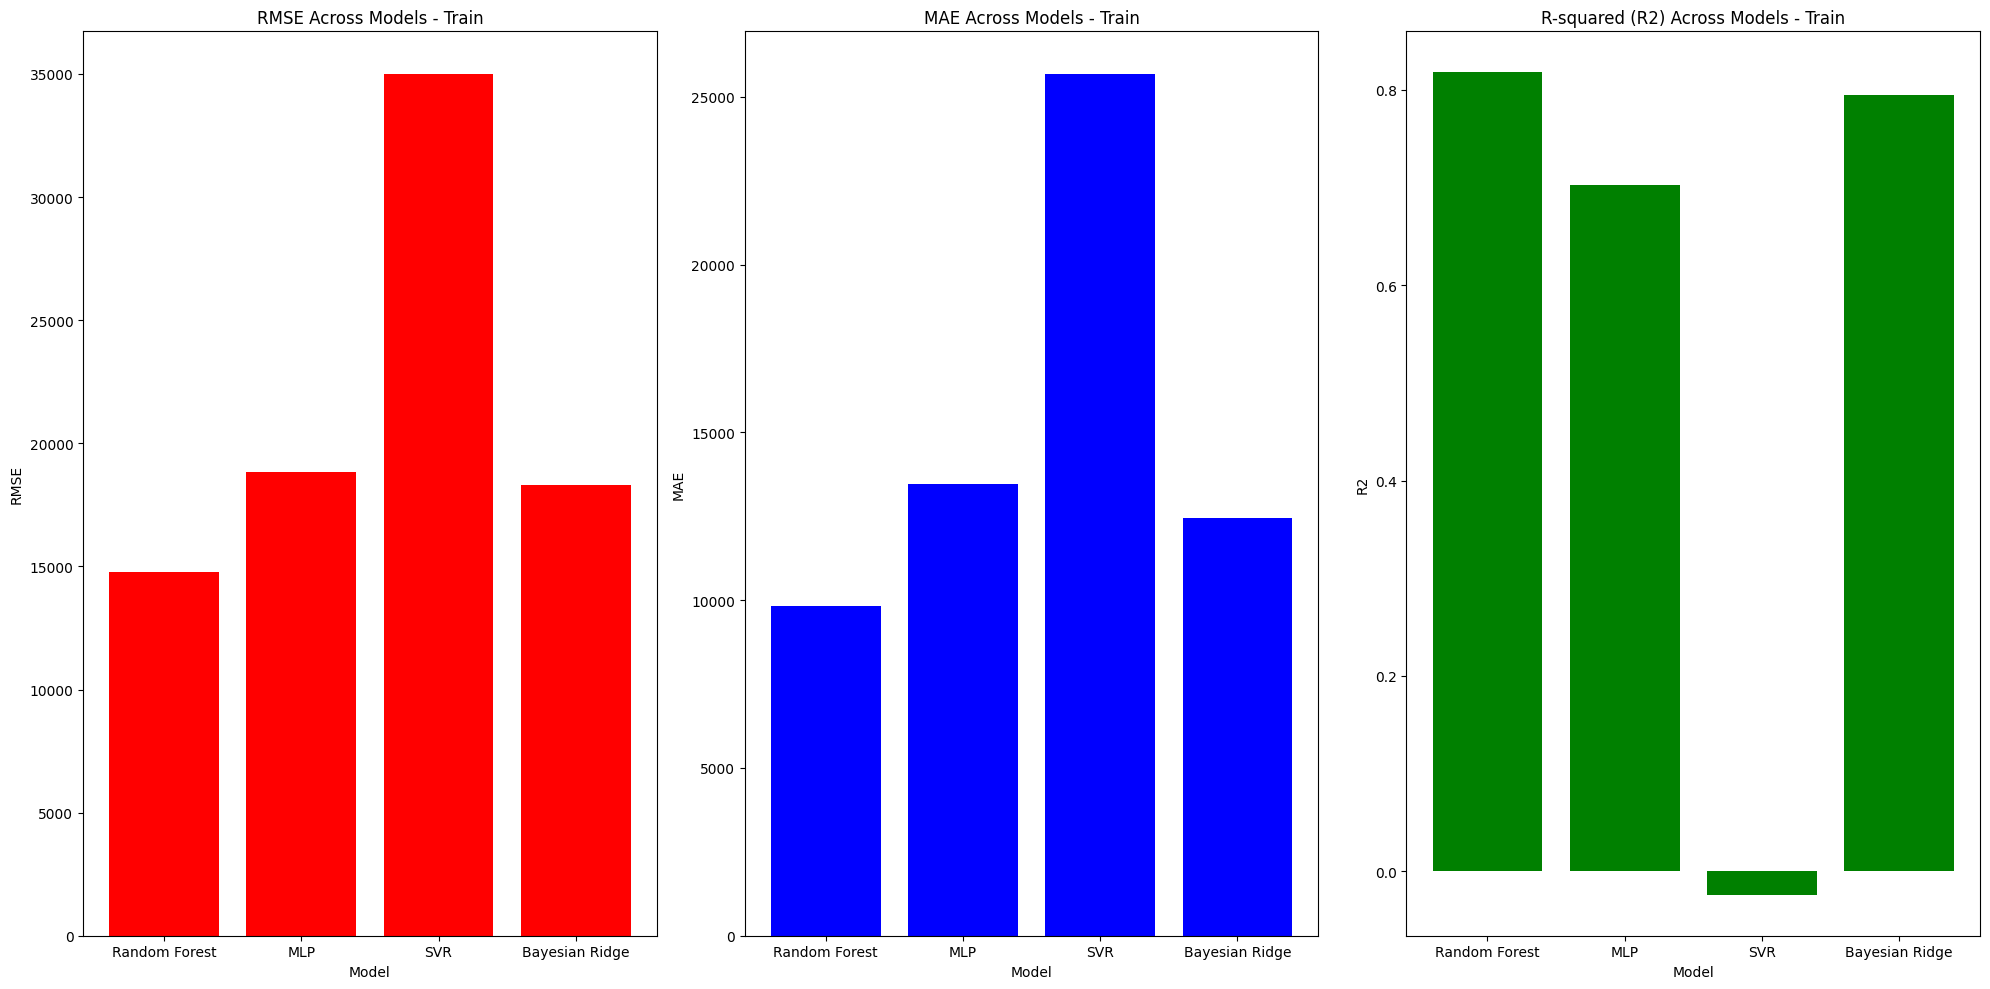

In [ ]:
import matplotlib.pyplot as plt

# Metrics values for each model
models = ['Random Forest', 'MLP', 'SVR', 'Bayesian Ridge']
rmse_values = [rmse_rf, rmse_mlp, rmse_svr, rmse_bayesian]
mae_values = [mae_rf, mae_mlp, mae_svr, mae_bayesian]
r2_values = [r2_rf, r2_mlp, r2_svr, r2_bayesian]

# Plotting
plt.figure(figsize=(20, 10))

# RMSE
plt.subplot(1, 3, 1)
plt.bar(models, rmse_values, color='Red')
plt.title('RMSE Across Models - Train')
plt.xlabel('Model')
plt.ylabel('RMSE')

# MAE
plt.subplot(1, 3, 2)
plt.bar(models, mae_values, color='blue')
plt.title('MAE Across Models - Train')
plt.xlabel('Model')
plt.ylabel('MAE')

# R2
plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color='green')
plt.title('R-squared (R2) Across Models - Train')
plt.xlabel('Model')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

data = {
    'Model': models,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R-squared (R2)': r2_values
}
df = pd.DataFrame(data)

print(df)


            Model          RMSE           MAE  R-squared (R2)
0   Random Forest  14766.461069   9815.896875        0.817608
1             MLP  18846.598470  13461.000283        0.702889
2             SVR  34983.307081  25667.508871       -0.023703
3  Bayesian Ridge  18313.796589  12436.499573        0.794158


# Trival System vs Baseline Model - Train

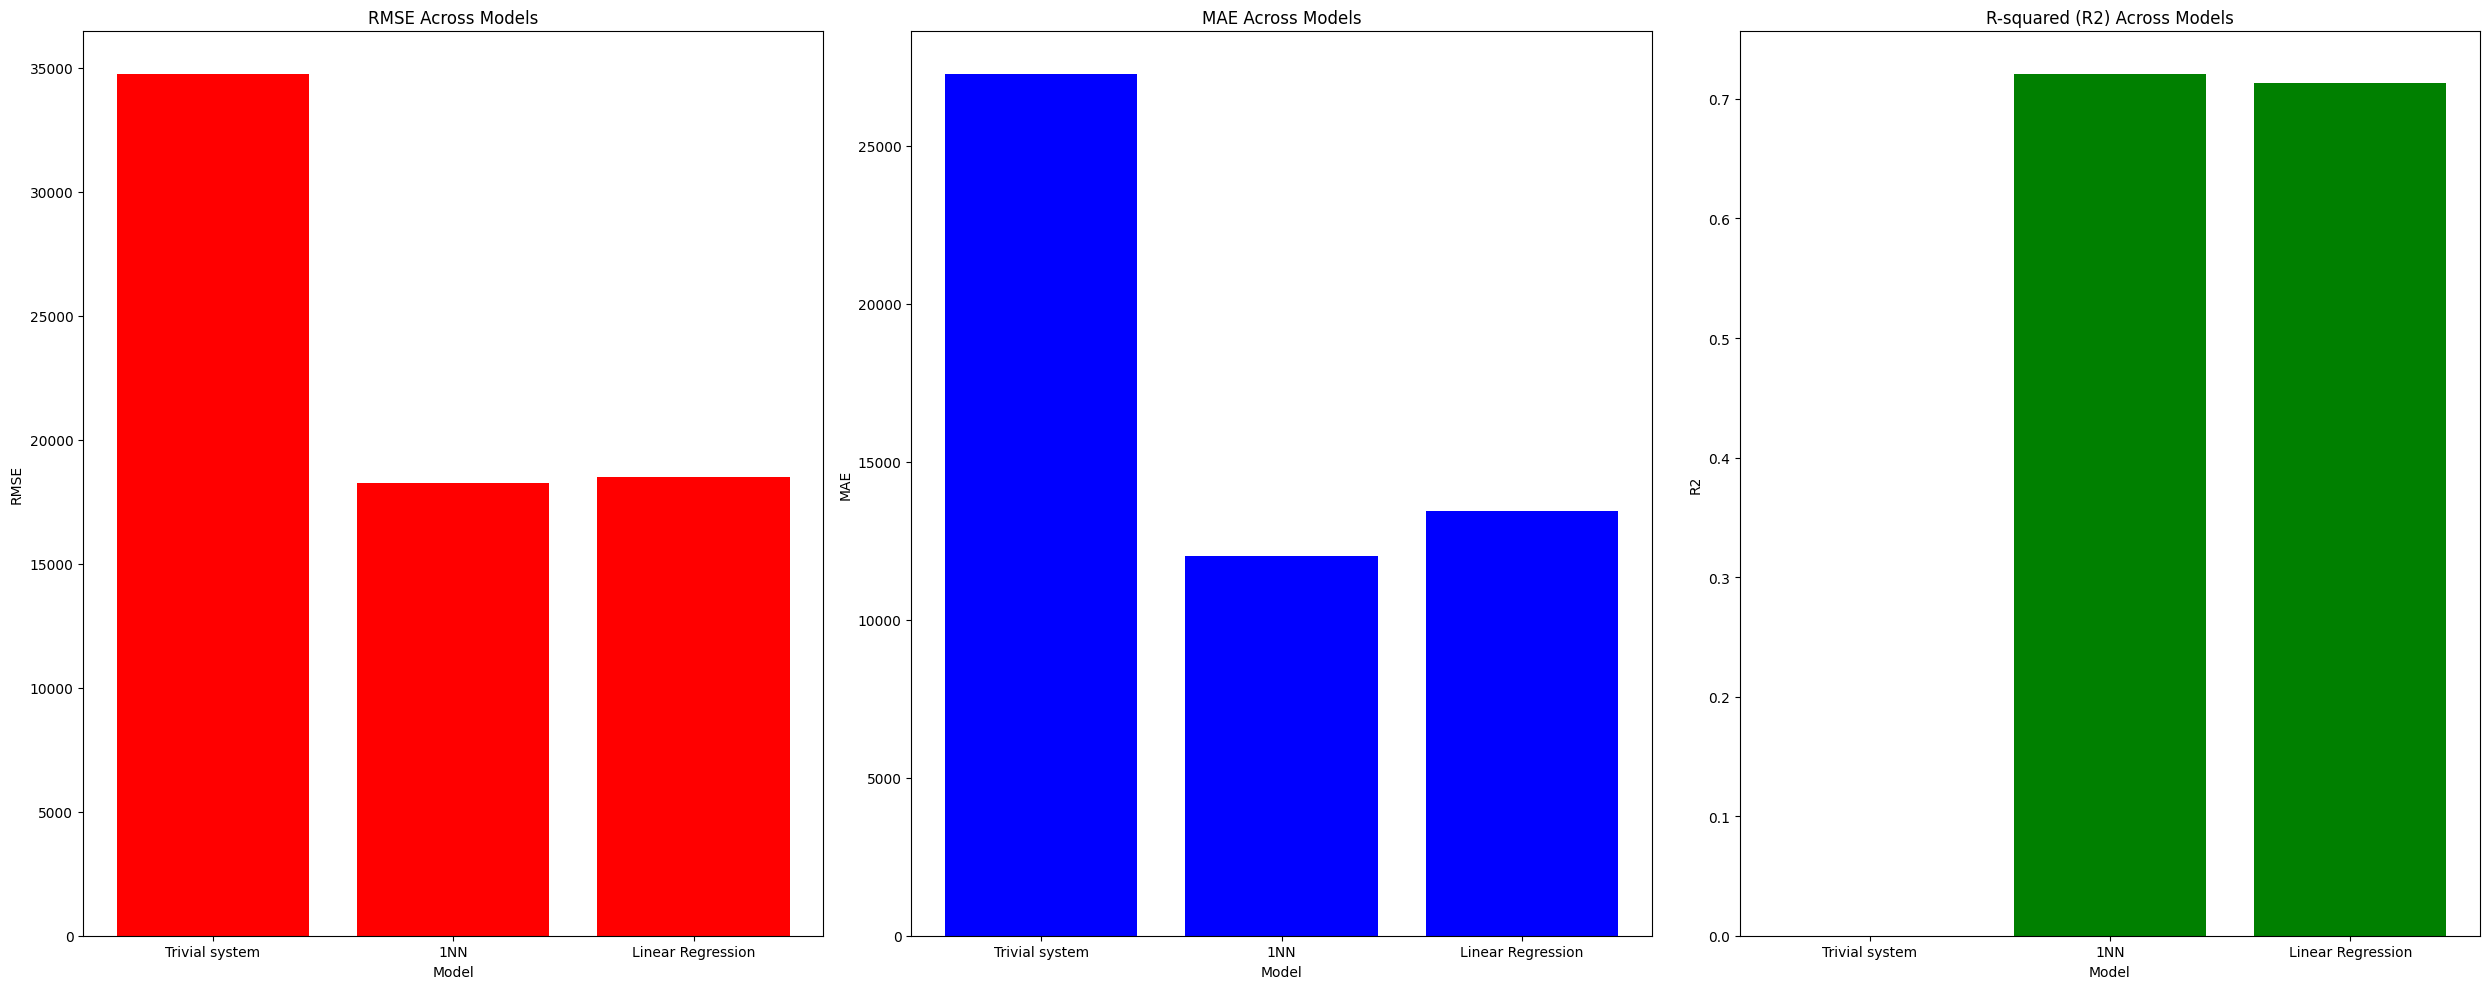

In [ ]:
#adding in the baseline models to compare

models = ['Trivial system', '1NN', 'Linear Regression']
rmse_values = [trivial_rmse,rmse_knn, rmse_linear_reg]
mae_values = [trivial_mae,mae_knn, mae_linear_reg]
r2_values = [trivial_r2, r2_knn, r2_linear_reg]

plt.figure(figsize=(25, 10))

# RMSE
plt.subplot(1, 3, 1)
plt.bar(models, rmse_values, color='Red')
plt.title('RMSE Across Models')
plt.xlabel('Model')
plt.ylabel('RMSE')

# MAE
plt.subplot(1, 3, 2)
plt.bar(models, mae_values, color='blue')
plt.title('MAE Across Models')
plt.xlabel('Model')
plt.ylabel('MAE')

# R2
plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color='green')
plt.title('R-squared (R2) Across Models')
plt.xlabel('Model')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


# Trival System vs 4 Models - Train

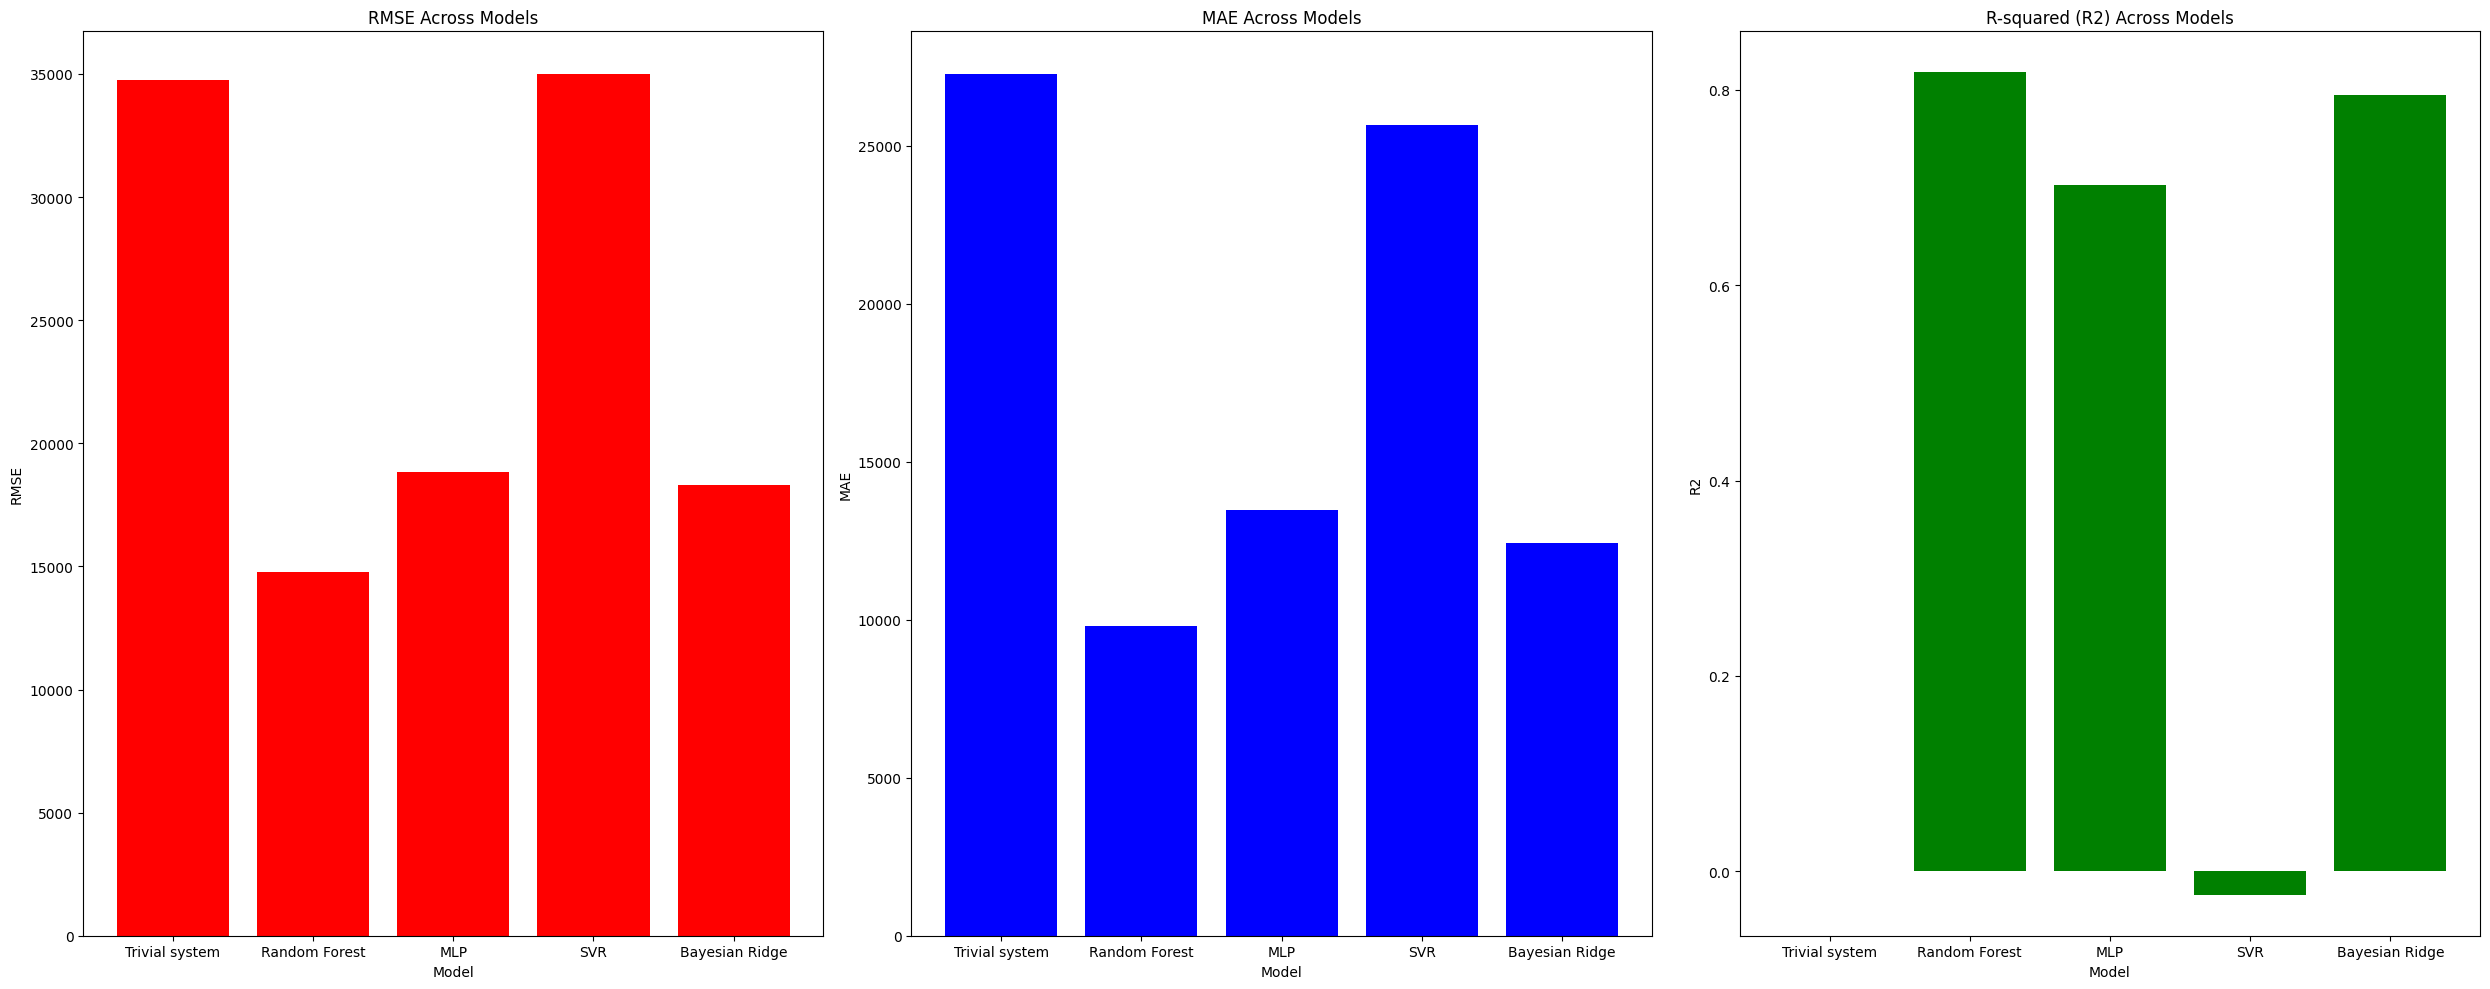

In [ ]:
#adding in the baseline models to compare

models = ['Trivial system', 'Random Forest', 'MLP', 'SVR', 'Bayesian Ridge']
rmse_values = [trivial_rmse, rmse_rf, rmse_mlp, rmse_svr, rmse_bayesian]
mae_values = [trivial_mae,  mae_rf, mae_mlp, mae_svr, mae_bayesian]
r2_values = [trivial_r2, r2_rf, r2_mlp, r2_svr, r2_bayesian]

plt.figure(figsize=(25, 10))

# RMSE
plt.subplot(1, 3, 1)
plt.bar(models, rmse_values, color='Red')
plt.title('RMSE Across Models')
plt.xlabel('Model')
plt.ylabel('RMSE')

# MAE
plt.subplot(1, 3, 2)
plt.bar(models, mae_values, color='blue')
plt.title('MAE Across Models')
plt.xlabel('Model')
plt.ylabel('MAE')

# R2
plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color='green')
plt.title('R-squared (R2) Across Models')
plt.xlabel('Model')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


# Comparison of the Metrics with Trival, Baseline, and 4 Models  - Train



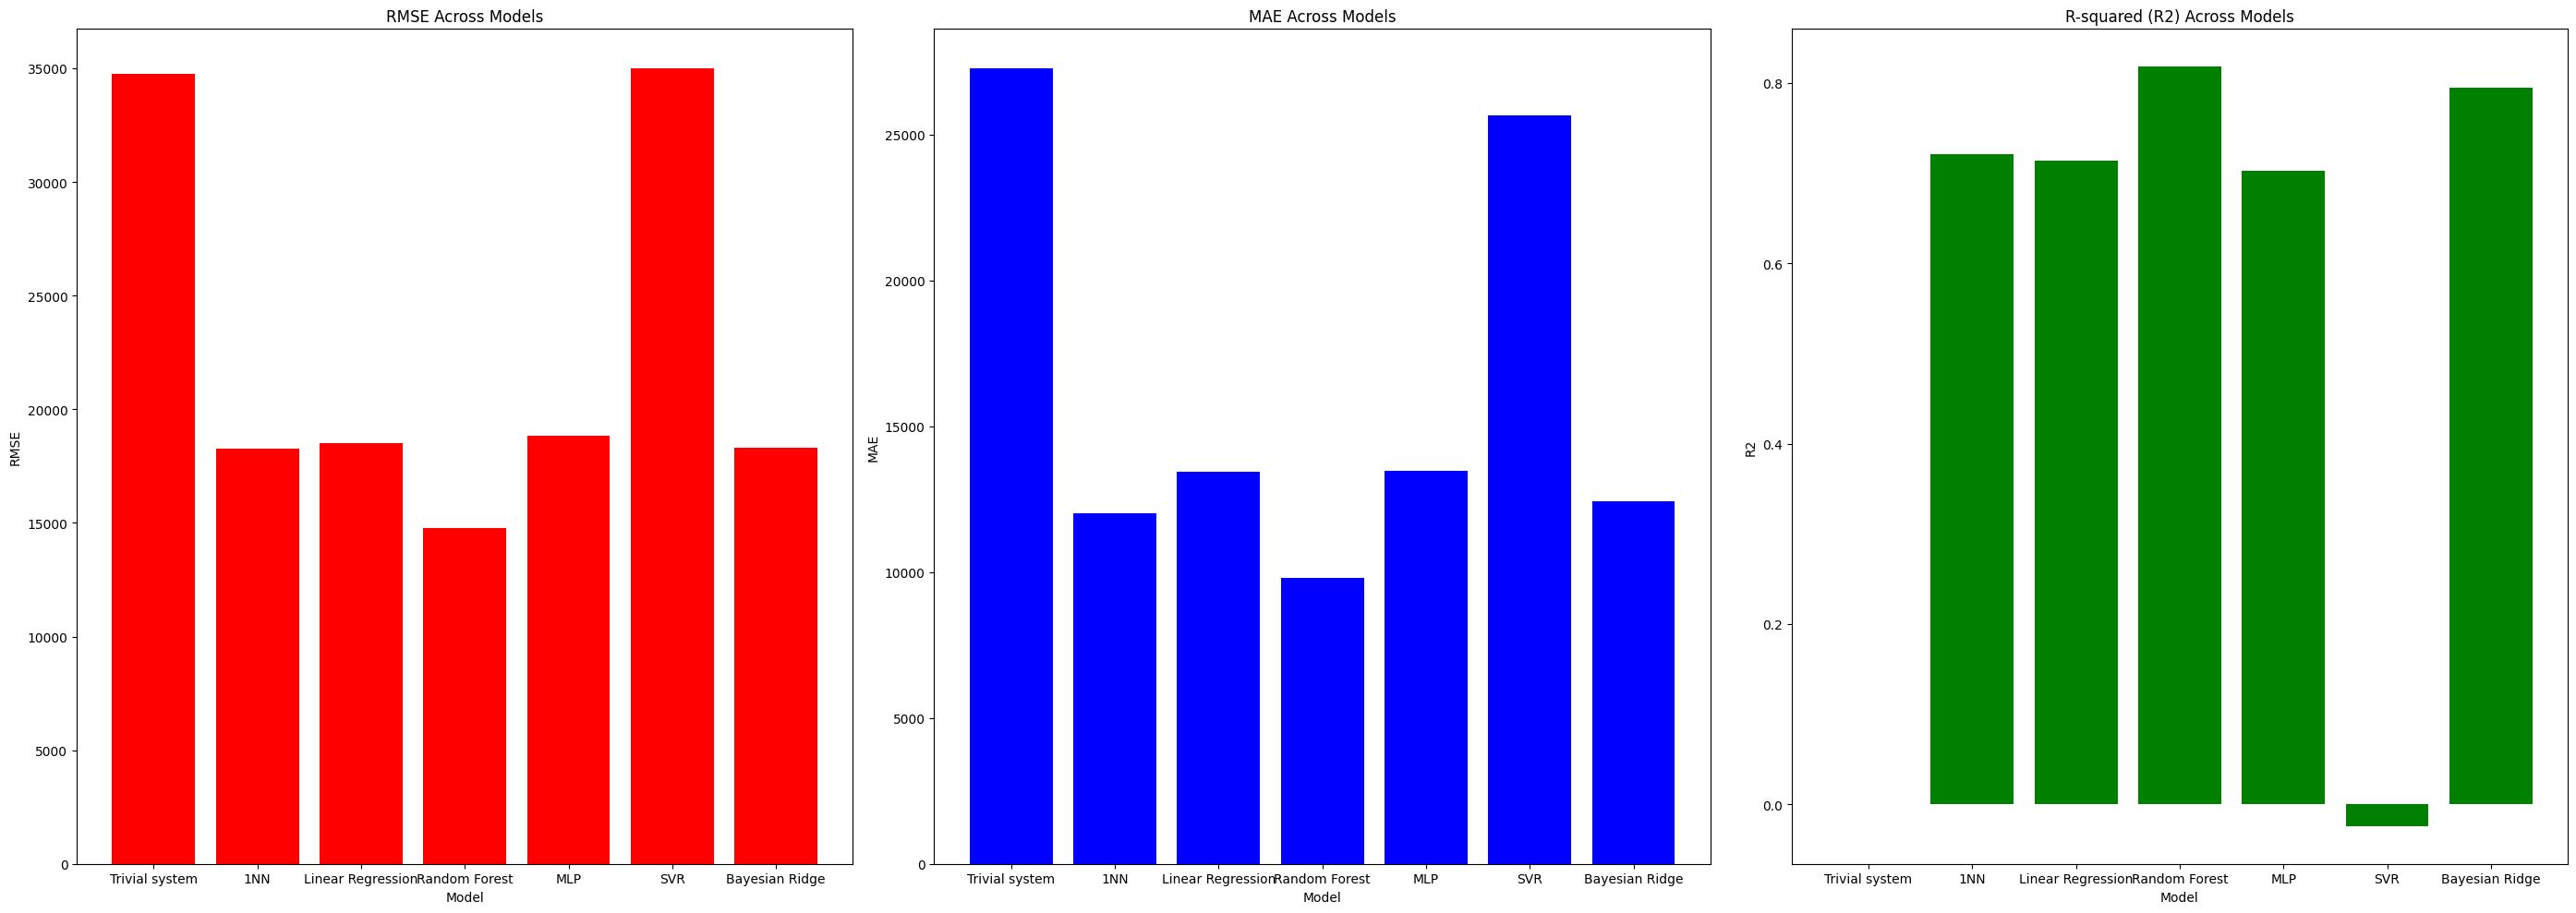

In [ ]:
#adding in the baseline models to compare

models = ['Trivial system','1NN', 'Linear Regression', 'Random Forest', 'MLP', 'SVR', 'Bayesian Ridge']
rmse_values = [trivial_rmse,rmse_knn, rmse_linear_reg, rmse_rf, rmse_mlp, rmse_svr, rmse_bayesian]
mae_values = [trivial_mae,mae_knn, mae_linear_reg, mae_rf, mae_mlp, mae_svr, mae_bayesian]
r2_values = [trivial_r2,r2_knn, r2_linear_reg, r2_rf, r2_mlp, r2_svr, r2_bayesian]

plt.figure(figsize=(28, 10))

# RMSE
plt.subplot(1, 3, 1)
plt.bar(models, rmse_values, color='Red')
plt.title('RMSE Across Models')
plt.xlabel('Model')
plt.ylabel('RMSE')

# MAE
plt.subplot(1, 3, 2)
plt.bar(models, mae_values, color='blue')
plt.title('MAE Across Models')
plt.xlabel('Model')
plt.ylabel('MAE')

# R2
plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color='green')
plt.title('R-squared (R2) Across Models')
plt.xlabel('Model')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


# Testing Dataset

In [ ]:
data_encoded_test.head()

,Inches,Ram,Weight,Price,Memory_Capacity,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,Resolution_Type_4K Ultra HD,Resolution_Type_Full HD,Resolution_Type_Others,Resolution_Type_Quad HD+,Touchscreen_No-touch,Touchscreen_Touchscreen,Resolution_dimensions_1920x1080,Resolution_dimensions_3200x1800,Resolution_dimensions_3840x2160,Resolution_dimensions_Others
0,17.3,32,3.58,68145.1200,256,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
1,13.3,16,1.22,87858.7200,256,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
2,14.0,8,1.13,109170.7200,256,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3,15.6,8,1.95,104588.1072,512,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,15.6,16,1.08,111834.7200,512,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


splitting the data into x and y

In [ ]:
from sklearn.model_selection import train_test_split

# Dropping the price column and setting it equal to y
X = data_encoded_test.drop(columns=['Price'])
y = data_encoded_test['Price']

X_test, y_test = X, y



# Trival System - Test

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_train_price = np.mean(y_train)  # Trivial prediction (e.g., mean or median)

# Calculate MSE
trivial_mse_test = mean_squared_error(y_test, np.full_like(y_test, mean_train_price))
trivial_rmse_test = np.sqrt(trivial_mse_test)
# Calculate MAE
trivial_mae_test = mean_absolute_error(y_test, np.full_like(y_test, mean_train_price))

# Calculate R2
tss = np.sum((y_test - np.mean(y_train))**2)
rss = np.sum((y_test - mean_train_price)**2)
trivial_r2_test = 1 - (rss / tss)

print("Mean Squared Error of trivial system:", trivial_mse_test)
print("Root Mean Squared Error of trivial system:", trivial_rmse_test)
print("Mean Absolute Error (MAE) of trivial system:", trivial_mae_test)
print("R-squared (R2) of trivial system:", trivial_r2_test)

Mean Squared Error of trivial system: 1292472922.7323859
Root Mean Squared Error of trivial system: 35950.979440515744
Mean Absolute Error (MAE) of trivial system: 27886.402682132193
R-squared (R2) of trivial system: 0.0


# Baseline 1: 1NN - Test

In [ ]:
knn_model_test = train_knn(X_test, y_test)

y_pred_knn_test = knn_model_test.predict(X_test)

mse_knn_test = mean_squared_error(y_test, y_pred_knn_test)
rmse_knn_test = np.sqrt(mse_knn_test)
mae_knn_test = mean_absolute_error(y_test, y_pred_knn_test)
r2_knn_test = r2_score(y_test, y_pred_knn_test)

print("Mean Squared Error of KNN on Test Data:", mse_knn_test)
print("Root Mean Squared Error (RMSE) of KNN on Test Data:", rmse_knn_test)
print("Mean Absolute Error (MAE) of KNN on Test Data:", mae_knn_test)
print("R-squared (R2) of KNN on Test Data:", r2_knn_test)


Mean Squared Error of KNN on Test Data: 23164203.012462806
Root Mean Squared Error (RMSE) of KNN on Test Data: 4812.920424488941
Mean Absolute Error (MAE) of KNN on Test Data: 743.5104716417909
R-squared (R2) of KNN on Test Data: 0.9819605186093943


# Baseline 1: Linear Regression - Test

In [ ]:
linear_reg_model_test = train_linear_regression(X_test, y_test)

y_pred_linear_reg_test = linear_reg_model_test.predict(X_test)

mse_linear_reg_test = mean_squared_error(y_test, y_pred_linear_reg_test)
rmse_linear_reg_test = np.sqrt(mse_linear_reg_test)
mae_linear_reg_test = mean_absolute_error(y_test, y_pred_linear_reg_test)
r2_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

print("Mean Squared Error of Linear Regression on Test Data:", mse_linear_reg_test)
print("Root Mean Squared Error (RMSE) of Linear Regression on Test Data:", rmse_linear_reg_test)
print("Mean Absolute Error (MAE) of Linear Regression on Test Data:", mae_linear_reg_test)
print("R-squared (R2) of Linear Regression on Test Data:", r2_linear_reg_test)


Mean Squared Error of Linear Regression on Test Data: 333975784.98587286
Root Mean Squared Error (RMSE) of Linear Regression on Test Data: 18275.00437717794
Mean Absolute Error (MAE) of Linear Regression on Test Data: 13003.301383930402
R-squared (R2) of Linear Regression on Test Data: 0.7399111916380567


# Random Forest Model - Test

In [ ]:
rf_model_test = train_random_forest(X_test, y_test)

y_pred_rf_test = rf_model_test.predict(X_test)

mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
rmse_rf_test = np.sqrt(mse_rf_test)
mae_rf_test = mean_absolute_error(y_test, y_pred_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)

print("Mean Squared Error of Random Forest on Test Data:", mse_rf_test)
print("Root Mean Squared Error (RMSE) of Random Forest on Test Data:", rmse_rf_test)
print("Mean Absolute Error (MAE) of Random Forest on Test Data:", mae_rf_test)
print("R-squared (R2) of Random Forest on Test Data:", r2_rf_test)


Mean Squared Error of Random Forest on Test Data: 54729773.076746166
Root Mean Squared Error (RMSE) of Random Forest on Test Data: 7397.957358402802
Mean Absolute Error (MAE) of Random Forest on Test Data: 4459.4893092818775
R-squared (R2) of Random Forest on Test Data: 0.9573783426781897


# MLP - Test

In [ ]:
y_test_pred = mlp_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)

print(f"Mean Squared Error of MLP on Test Data: {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R-squared (R2) of MLP on Test Data: {rmse_test}")
print(f"R^2 Score on MLP Test Data: {r2_test}")

Mean Squared Error of MLP on Test Data: 510467398.9413824
Mean Absolute Error (MAE): 15473.070965867346
R-squared (R2) of MLP on Test Data: 22593.52559786503
R^2 Score on MLP Test Data: 0.6024656173683345


# SVR - Test

In [ ]:
svr_model_test = train_svr(X_test, y_test)

y_pred_svr_test = svr_model_test.predict(X_test)

mse_svr_test = mean_squared_error(y_test, y_pred_svr_test)
rmse_svr_test = np.sqrt(mse_svr_test)
mae_svr_test = mean_absolute_error(y_test, y_pred_svr_test)
r2_svr_test = r2_score(y_test, y_pred_svr_test)

print("Mean Squared Error of SVR on Test Data:", mse_svr_test)
print("Root Mean Squared Error (RMSE) of SVR on Test Data:", rmse_svr_test)
print("Mean Absolute Error (MAE) of SVR on Test Data:", mae_svr_test)
print("R-squared (R2) of SVR on Test Data:", r2_svr_test)


Mean Squared Error of SVR on Test Data: 1307602143.5970316
Root Mean Squared Error (RMSE) of SVR on Test Data: 36160.78184438262
Mean Absolute Error (MAE) of SVR on Test Data: 27837.62045900846
R-squared (R2) of SVR on Test Data: -0.018315394794447215


# Bayesian Ridge Regression Model - Test


In [ ]:
bayesian_ridge_model_test = train_bayesian_ridge(X_test, y_test)

y_pred_bayesian_ridge_test = bayesian_ridge_model_test.predict(X_test)

mse_bayesian_ridge_test = mean_squared_error(y_test, y_pred_bayesian_ridge_test)
rmse_bayesian_ridge_test = np.sqrt(mse_bayesian_ridge_test)
mae_bayesian_ridge_test = mean_absolute_error(y_test, y_pred_bayesian_ridge_test)
r2_bayesian_ridge_test = r2_score(y_test, y_pred_bayesian_ridge_test)

print("Mean Squared Error of Bayesian Ridge on Test Data:", mse_bayesian_ridge_test)
print("Root Mean Squared Error (RMSE) of Bayesian Ridge on Test Data:", rmse_bayesian_ridge_test)
print("Mean Absolute Error (MAE) of Bayesian Ridge on Test Data:", mae_bayesian_ridge_test)
print("R-squared (R2) of Bayesian Ridge on Test Data:", r2_bayesian_ridge_test)


Mean Squared Error of Bayesian Ridge on Test Data: 346144815.51668084
Root Mean Squared Error (RMSE) of Bayesian Ridge on Test Data: 18604.967495716857
Mean Absolute Error (MAE) of Bayesian Ridge on Test Data: 13171.12869012176
R-squared (R2) of Bayesian Ridge on Test Data: 0.7304343708864809


# Table for the Metrics Output

In [ ]:
import pandas as pd

data = {
    'Model': ['KNN', 'Linear Regression', 'Random Forest', 'MLP', 'SVR', 'Bayesian Ridge'],
    'MSE': [mse_knn_test, mse_linear_reg_test, mse_rf_test, mse_test, mse_svr_test, mse_bayesian_ridge_test],
    'RMSE': [rmse_knn_test, rmse_linear_reg_test, rmse_rf_test, rmse_test, rmse_svr_test, rmse_bayesian_ridge_test],
    'MAE': [mae_knn_test, mae_linear_reg_test, mae_rf_test, mae_test, mae_svr_test, mae_bayesian_ridge_test],
    'R-squared': [r2_knn_test, r2_linear_reg_test, r2_rf_test, r2_test, r2_svr_test, r2_bayesian_ridge_test]
}

df = pd.DataFrame(data)

df.set_index('Model', inplace=True)

print(df)


                            MSE          RMSE           MAE  R-squared
Model                                                                 
KNN                2.316420e+07   4812.920424    743.510472   0.981961
Linear Regression  3.339758e+08  18275.004377  13003.301384   0.739911
Random Forest      5.472977e+07   7397.957358   4459.489309   0.957378
MLP                5.104674e+08  22593.525598  15473.070966   0.602466
SVR                1.307602e+09  36160.781844  27837.620459  -0.018315
Bayesian Ridge     3.461448e+08  18604.967496  13171.128690   0.730434


# Trival System vs Baseline System - Test


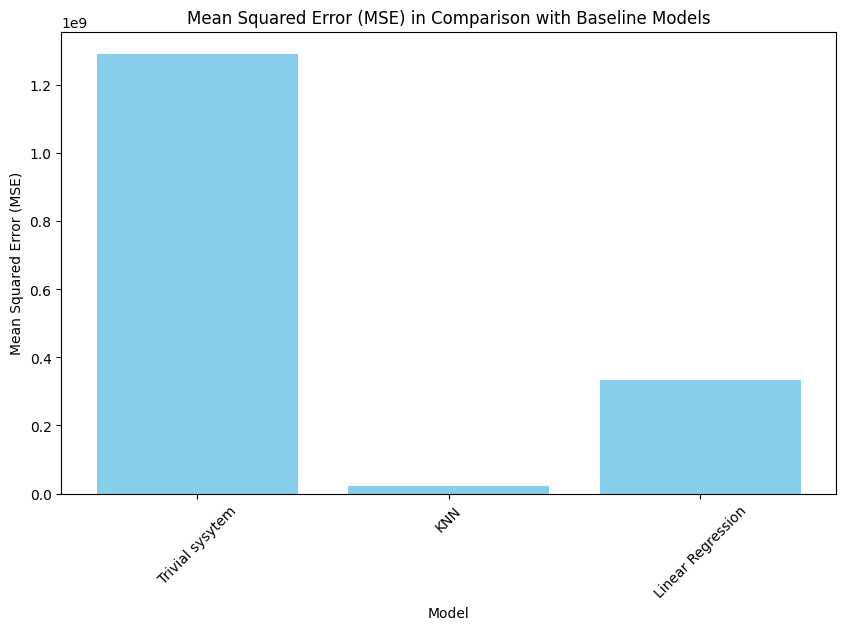

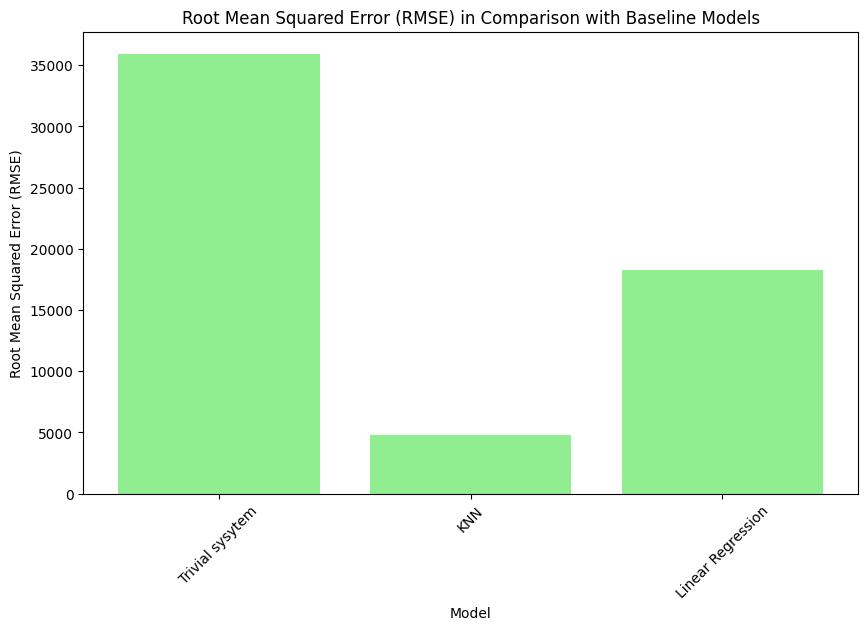

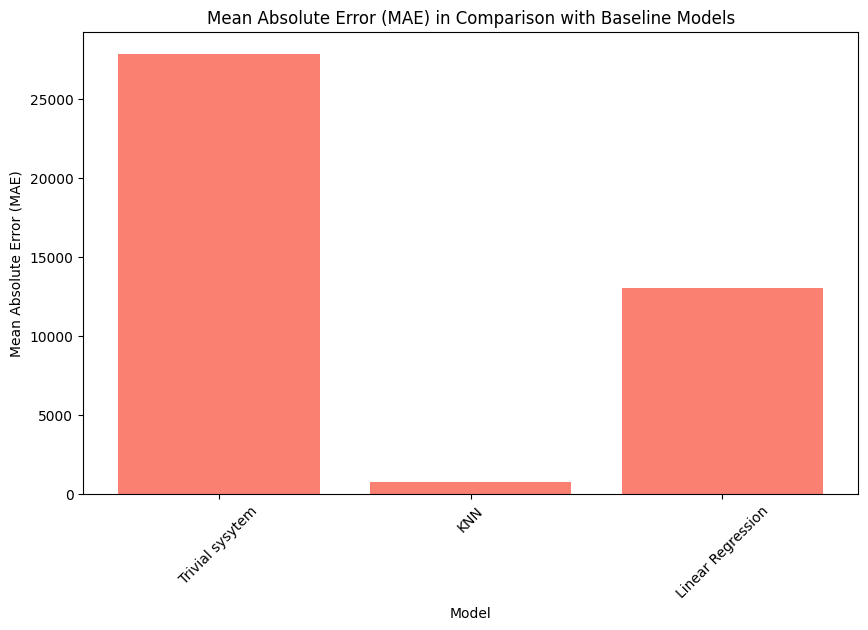

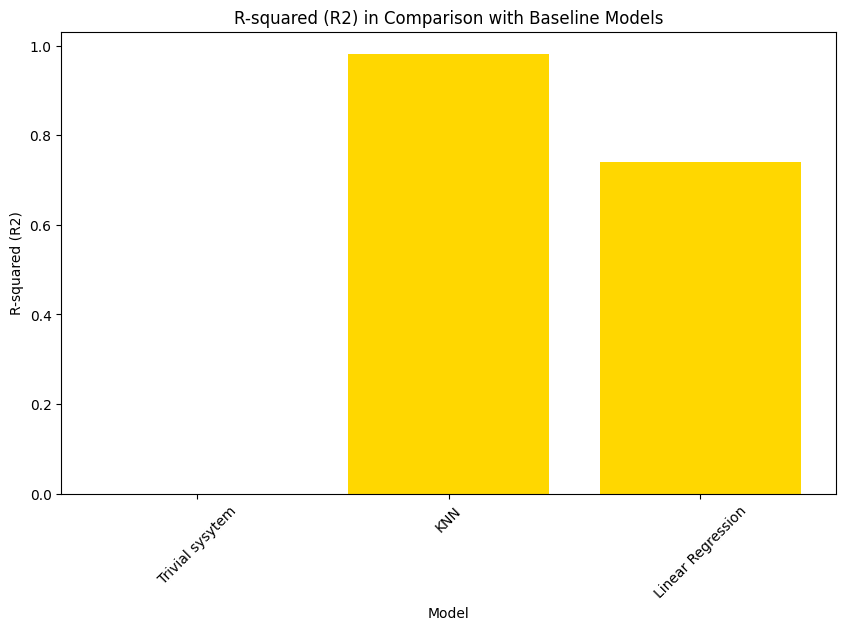

In [ ]:
import matplotlib.pyplot as plt

models = ['Trivial sysytem','KNN', 'Linear Regression']

mse = [trivial_mse_test ,mse_knn_test, mse_linear_reg_test]
rmse = [trivial_rmse_test, rmse_knn_test, rmse_linear_reg_test]
mae = [trivial_mae_test, mae_knn_test, mae_linear_reg_test]
r2 = [trivial_r2_test, r2_knn_test, r2_linear_reg_test]

plt.figure(figsize=(10, 6))
plt.bar(models, mse, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) in Comparison with Baseline Models')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, rmse, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Root Mean Squared Error (RMSE) in Comparison with Baseline Models')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, mae, color='salmon')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) in Comparison with Baseline Models')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, r2, color='gold')
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('R-squared (R2) in Comparison with Baseline Models')
plt.xticks(rotation=45)
plt.show()


# Trival System vs 4 Models - Test


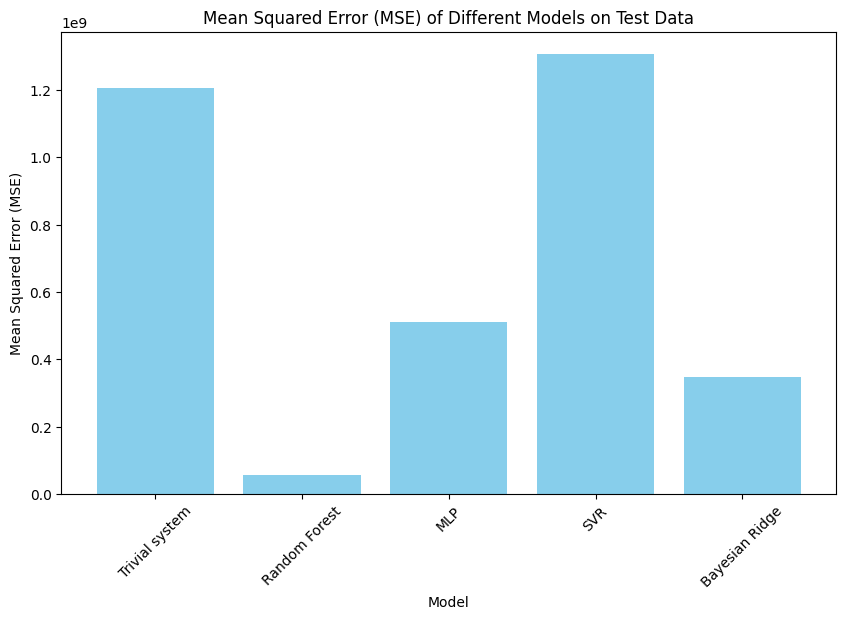

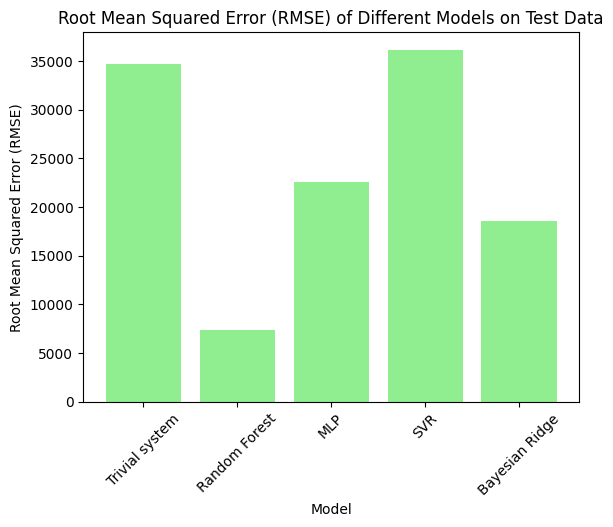

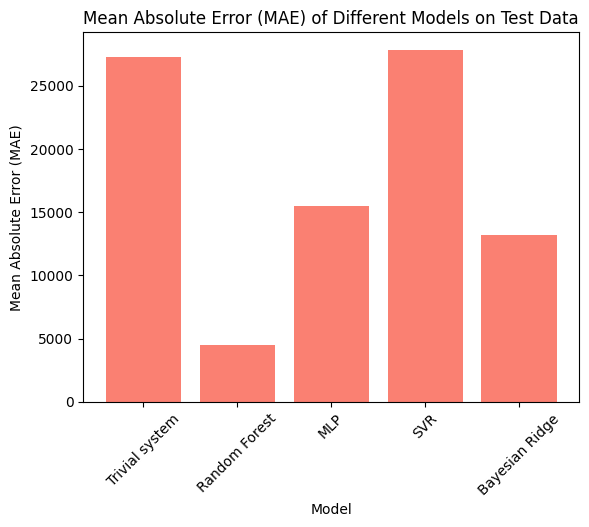

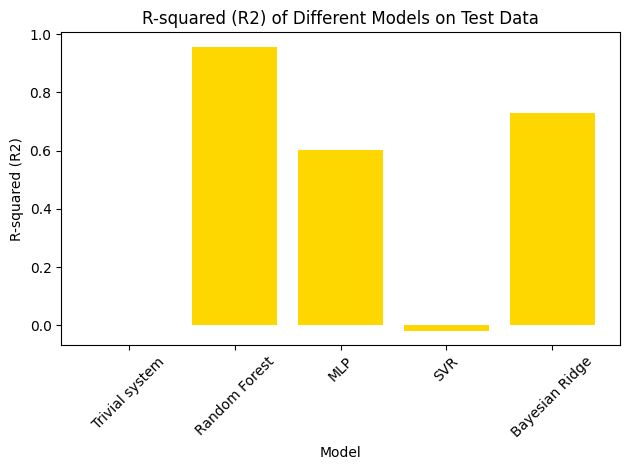

In [ ]:
import matplotlib.pyplot as plt

models = ['Trivial system','Random Forest', 'MLP', 'SVR', 'Bayesian Ridge']

mse = [trivial_mse,mse_rf_test, mse_test, mse_svr_test, mse_bayesian_ridge_test]
rmse = [trivial_rmse,rmse_rf_test, rmse_test, rmse_svr_test, rmse_bayesian_ridge_test]
mae = [trivial_mae,mae_rf_test, mae_test, mae_svr_test, mae_bayesian_ridge_test]
r2 = [trivial_r2,r2_rf_test, r2_test, r2_svr_test, r2_bayesian_ridge_test]

plt.figure(figsize=(10, 6))
plt.bar(models, mse, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) of Different Models on Test Data')
plt.xticks(rotation=45)
plt.show()


plt.bar(models, rmse, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Root Mean Squared Error (RMSE) of Different Models on Test Data')
plt.xticks(rotation=45)
plt.show()


plt.bar(models, mae, color='salmon')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) of Different Models on Test Data')
plt.xticks(rotation=45)
plt.show()

plt.bar(models, r2, color='gold')
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('R-squared (R2) of Different Models on Test Data')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Plot the three metrics (RMSE, MAE, R2) across the four models (Random Forest, MLP, SVR, Bayesian Ridge) - Test

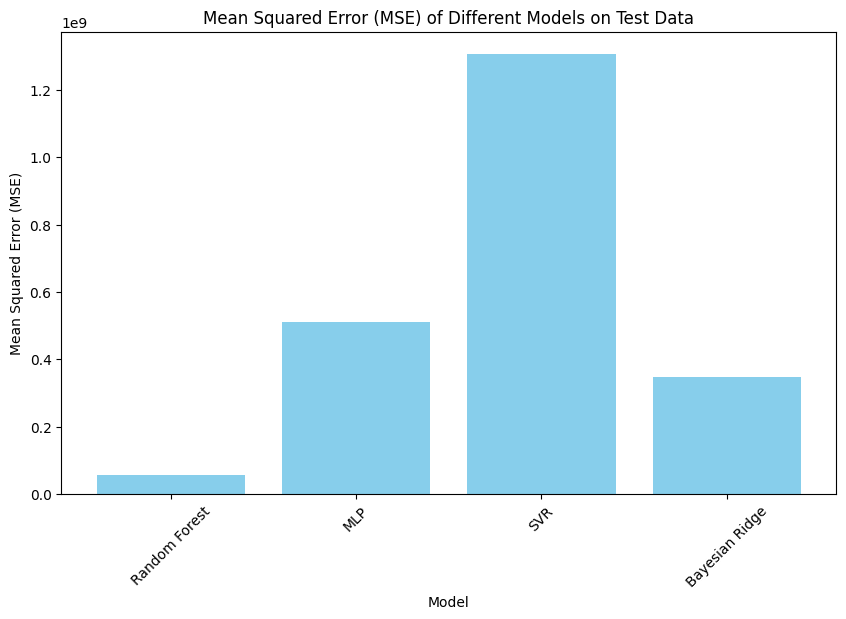

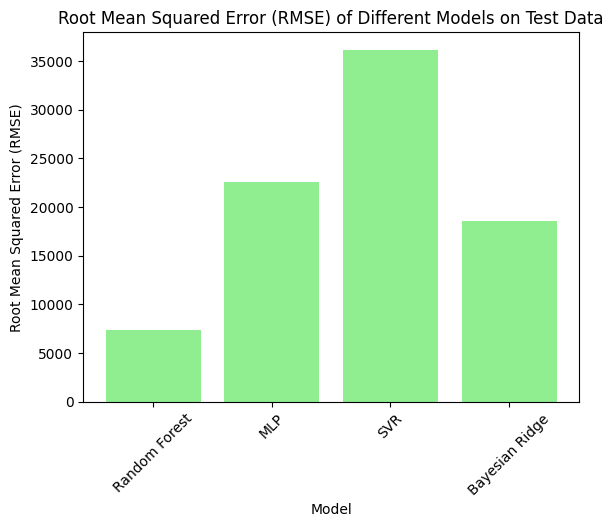

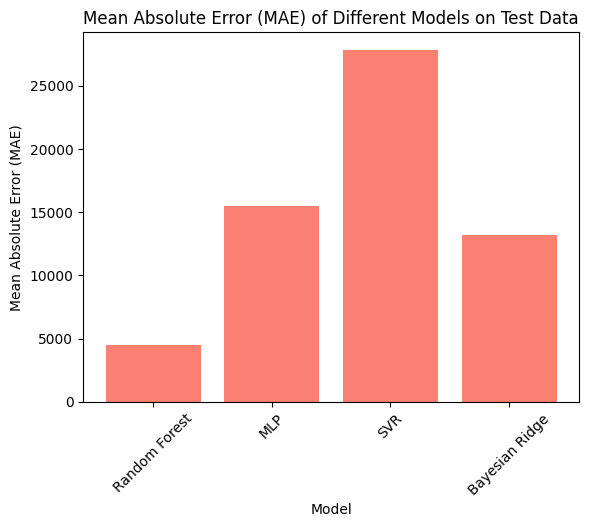

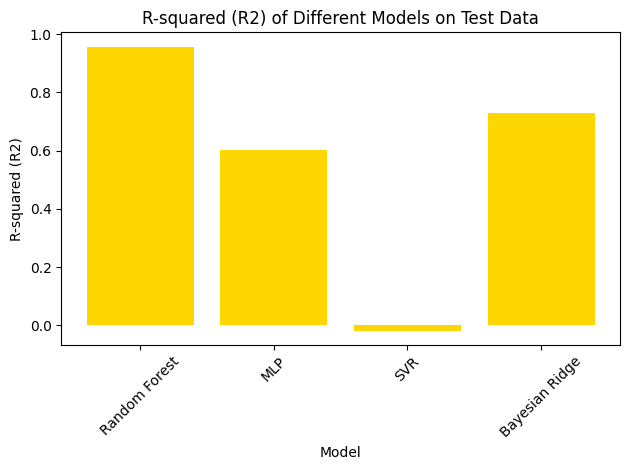

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'MLP', 'SVR', 'Bayesian Ridge']

mse = [mse_rf_test, mse_test, mse_svr_test, mse_bayesian_ridge_test]
rmse = [rmse_rf_test, rmse_test, rmse_svr_test, rmse_bayesian_ridge_test]
mae = [mae_rf_test, mae_test, mae_svr_test, mae_bayesian_ridge_test]
r2 = [r2_rf_test, r2_test, r2_svr_test, r2_bayesian_ridge_test]

plt.figure(figsize=(10, 6))
plt.bar(models, mse, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) of Different Models on Test Data')
plt.xticks(rotation=45)
plt.show()


plt.bar(models, rmse, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Root Mean Squared Error (RMSE) of Different Models on Test Data')
plt.xticks(rotation=45)
plt.show()


plt.bar(models, mae, color='salmon')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) of Different Models on Test Data')
plt.xticks(rotation=45)
plt.show()

plt.bar(models, r2, color='gold')
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('R-squared (R2) of Different Models on Test Data')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Plotting the Metrics of the 4 Models in Comparison to Baseline Models and Trivial - Test

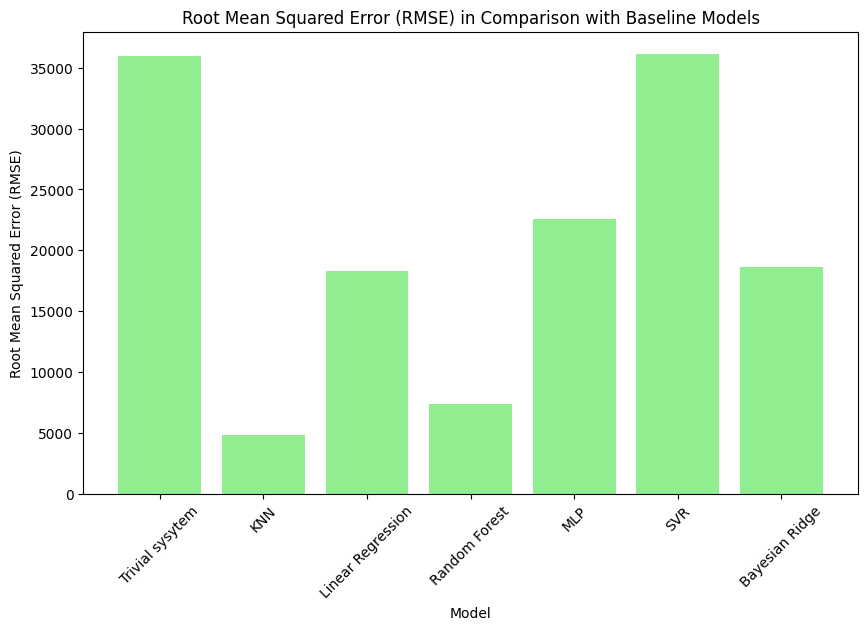

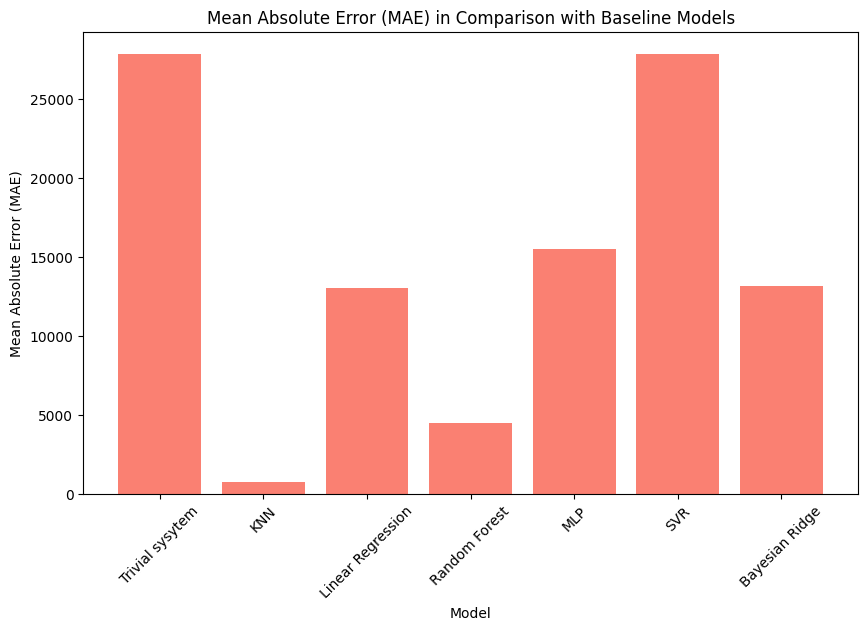

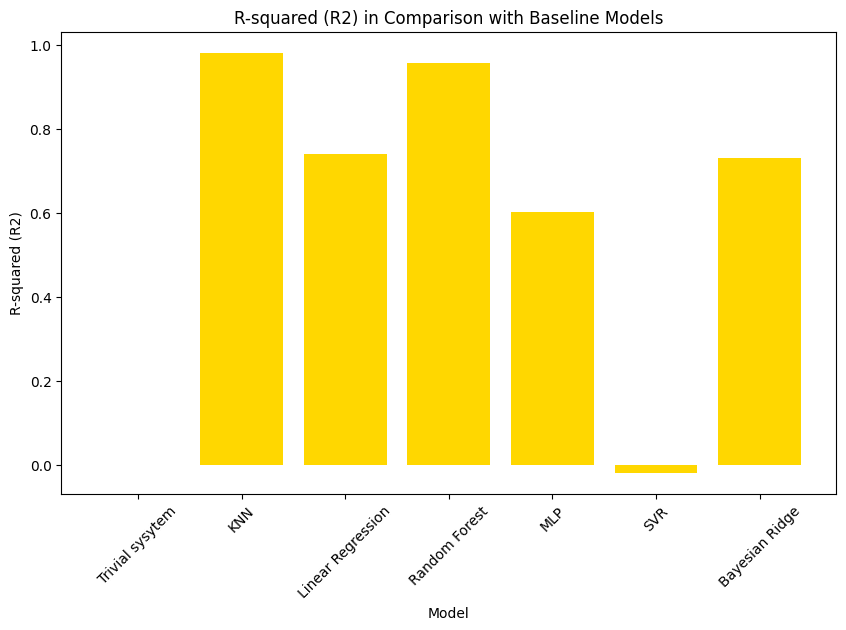

In [ ]:
import matplotlib.pyplot as plt

models = ['Trivial sysytem','KNN', 'Linear Regression', 'Random Forest', 'MLP', 'SVR', 'Bayesian Ridge']

mse = [trivial_mse_test ,mse_knn_test, mse_linear_reg_test, mse_rf_test, mse_test, mse_svr_test, mse_bayesian_ridge_test]
rmse = [trivial_rmse_test, rmse_knn_test, rmse_linear_reg_test, rmse_rf_test, rmse_test, rmse_svr_test, rmse_bayesian_ridge_test]
mae = [trivial_mae_test, mae_knn_test, mae_linear_reg_test, mae_rf_test, mae_test, mae_svr_test, mae_bayesian_ridge_test]
r2 = [trivial_r2_test, r2_knn_test, r2_linear_reg_test, r2_rf_test, r2_test, r2_svr_test, r2_bayesian_ridge_test]


plt.figure(figsize=(10, 6))
plt.bar(models, rmse, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Root Mean Squared Error (RMSE) in Comparison with Baseline Models')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, mae, color='salmon')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) in Comparison with Baseline Models')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, r2, color='gold')
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('R-squared (R2) in Comparison with Baseline Models')
plt.xticks(rotation=45)
plt.show()
